In [2]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# from auswertung_ma import f_exp, f_poly, f_poly_long

In [3]:
# plot settings:
plot_output_path = r'D:\Uni\Masterarbeit\MA_Dokument\english\bilder'

markersize = 11
markerfacecolor = 'none'

label_fontsize = 20
capsize = 5
axislabelsize = 35

legendfontsize = 30

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
})

In [253]:
data1 = {}
p1 = r"D:\Uni\Masterarbeit\Daten\KFC2\1_scenario"

for ho in os.listdir(p1):
#     print(ho)
    if not 'Vorauswertung' in ho and "KFC" in ho:
        n = int(ho.split("_")[1])
        data1[n] = auswertung_ma.Read_HO(os.path.join(p1, ho), 'p', -2, read_tracking=False, read_lp=False)

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


In [11]:
# fig, ax = plt.subplots(figsize=(16,10))

# for n in sorted(data1.keys()):
#     ax.scatter(data1[n].id_values, data1[n].anteil_ganz_geloest, label=f'N={n}')
    
# ax.set_xlabel('p_k', fontsize=20)
# ax.set_ylabel('$r_{sol}$', fontsize=20)
# ax.set_title('1 Szenario, KFC2(p_k)', fontsize=20)
# ax.legend(fontsize=20)

In [12]:
print(data1[160].m_res['Schranke4b']['ms'])
print(data1[160].m_res['LP_Approx']['ms'])

[159.0, 150.97307232499992, 139.11097713999996, 119.3785940402176, 118.36793198, 117.7223118250001, 117.12400463499995, 115.35485967909104, 114.59542726681812, 114.00732455272737, 113.07149858724983, 111.1985605, 100.14571463666665, 83.71922904333327]
[159.0, 150.97307232499992, 139.11097713999996, 119.37952691652193, 118.36959811749999, 117.72508416000011, 117.12815211499993, 115.36064494454551, 114.6015736870455, 114.01713461136374, 113.08103042324998, 111.2215226725, 100.45031384166673, 84.63155626333341]


Text(0, 0.5, 'Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

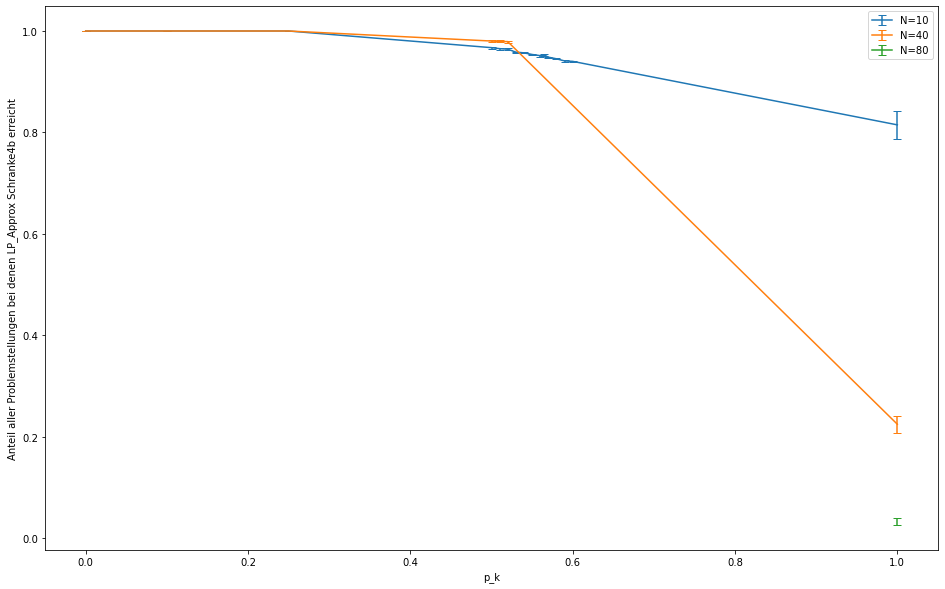

In [3]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.00
alg='LP_Approx'

ns = sorted(data1.keys())
# ns.reverse()
for n in ns[:-1]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.errorbar(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), yerr=data1[n].calc_std_deviation(data1[n].check_alg_vs_schranke4b(alg, alpha)[1]), capsize=4, label=f'N={n}')
    
    #ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    #ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()

ax.set_xlabel('p_k')
ax.set_ylabel('Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

# ax.set_xlim([0.49,.61])
# ax.set_ylim([0.9, 1.02])
# plt.savefig('pk_uebergang_lp.png')

Der LP-Approx erreicht die Schranke bis zu p_krit, obwohl nicht alle Problemstellungen ganz gelöst werden

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen GreedyLP Schranke4b*1.1 erreicht')

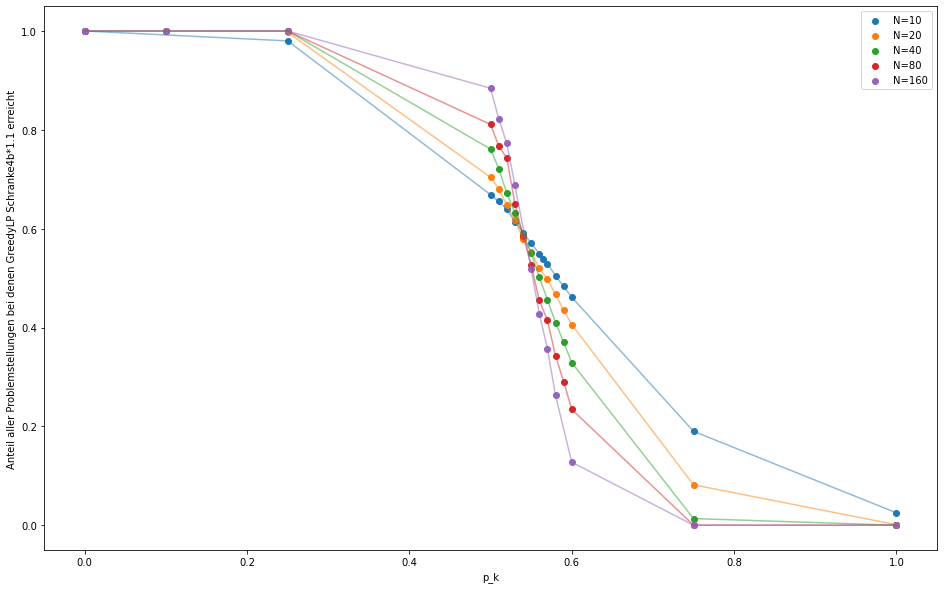

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='Greedy'

ns = sorted(data1.keys())
# ns.reverse()
for n in ns[:-1]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
ax.set_xlabel('p_k')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen GreedyLP Schranke4b*{alpha} erreicht')

# ax.set_xlim([0.49,0.61])
# ax.set_ylim([0.9, 1.02])
# plt.savefig('pk_uebergang_greedy.png')

Phasenübergang?

Ab einem bestimmten Prozentsatz an Kanten, die ich verändere, wird das Problem schwerer lösbar. Ist das genau 50%? Ich verändere jedes individuelle Kantengewicht mit dieser Wahrscheinlichkeit, nicht pro Kante. Das ist hier aber äquivalent, weil ich nur 1 Szenario habe!!

Je größer das System wird, desto mehr Kanten hab ich auch. Wenn weniger als 50% aller Kanten verändert werden, dann gilt für die Mehrheit der Kanten noch, dass sie in der ersten Stage 1 und in der 2. 2 Kosten. Es ist die Frage, ob die dann immer genommen werden oder nicht? Es gibt ja auch Kanten, die billiger werden. Reichen diese in Kombination mit den unveränderten immer aus, um einen min Spannbaum komplett in der ersten Phase zu bauen? Vielleicht ist der kritische Punkt aber auch etwas hinter 0.5?

Wie sieht das für 2 oder 5 szenarien aus? Weil dann ist es nicht mehr so eindeutig, da auch nur ein 2.Stage Wert pro Kante verändert werden kann.

In [134]:
data1[10].mean_anteil_lp_ganz

Text(0.5, 1.0, 'Loop-Iteration-Skalierung')

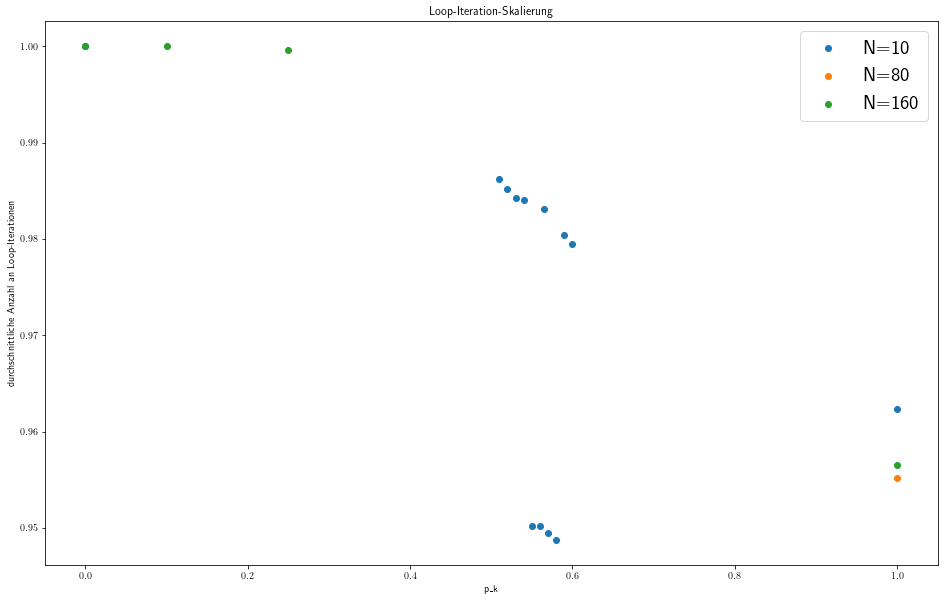

In [135]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data1.keys()):
    ax.scatter(data1[n].id_values, data1[n].mean_anteil_lp_ganz, label=f'N={n}')

ax.legend(fontsize=20)
ax.set_xlabel('p_k')
ax.set_ylabel('durchschnittliche Anzahl an Loop-Iterationen')
# ax.set_title('Loop-Iteration-Skalierung')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim([0,200])

Text(0, 0.5, 'durchschnittliche Anzahl an Loop-Iterationen')

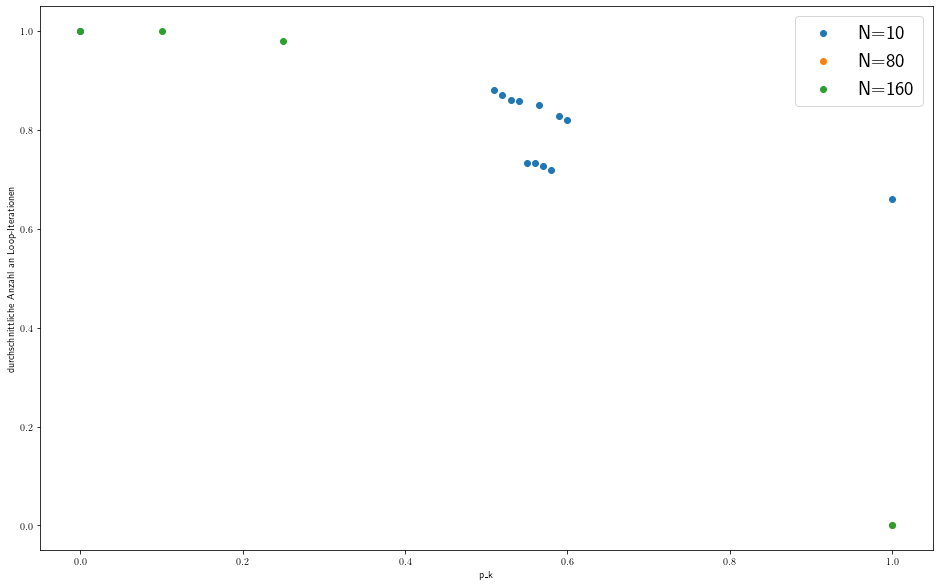

In [136]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data1.keys()):
    ax.scatter(data1[n].id_values, data1[n].anteil_ganz_geloest, label=f'N={n}')

ax.legend(fontsize=20)
ax.set_xlabel('p_k')
ax.set_ylabel('durchschnittliche Anzahl an Loop-Iterationen')
# ax.set_title('Loop-Iteration-Skalierung')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim([0,200])

Man kann mit dem Alpha fast beliebig irgendwelche Schnittpunkte erzwingen

# checke, ob wenn k=1 (1 szenario) Schranke und Optimum gleich sind

In [6]:
p_st10 = r"D:\Uni\Masterarbeit\Daten\KFC2\scenario_test_10_nodes_1_scenarios"
p_st20 = r"D:\Uni\Masterarbeit\Daten\KFC2\scenario_test_20_nodes_1_scenarios"

In [16]:
for subfolder in os.listdir(p_st10):
    df = auswertung_ma.read_results(os.path.join(p_st10, subfolder))
    df['diff'] = df['Schranke4b'] - df['Optimum2']
    print(df['diff'].mean())

0.0
0.0
0.0


In [19]:
for subfolder in os.listdir(p_st20):
    df = auswertung_ma.read_results(os.path.join(p_st20, subfolder))
    df['diff'] = df['Schranke4b'] - df['Optimum2']
    print(df['diff'].mean())

0.0
0.0
0.0


Ich schliesse, dass fuer 1 Szenario bestätigt wurde, dass Schranke4b und Optimum übereinstimmen

# neue vorausgewerteten Daten kommen dazu

In [168]:
pcc = r'D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\VA_c'
data_vor_c = auswertung_ma.read_vorauswertung(pcc, id='p', id_stelle=-2)

In [69]:
data_vor_c

{5000: <auswertung_ma.Read_HO at 0x28a0de2c3d0>,
 1280: <auswertung_ma.Read_HO at 0x28a47a26bf0>}

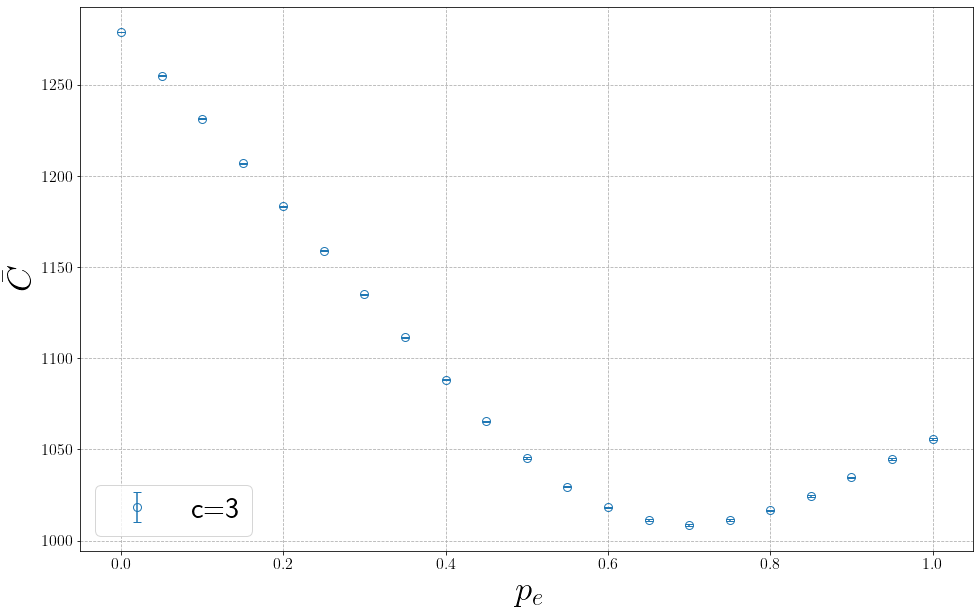

In [71]:
# reine Ergebnisse

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

algs = {'Schranke4b': r'Optimum', 'LP_Approx': 'LP Approximation', 'Greedy': 'Greedy'}

m, sme = data_vor_c[1280].calc_mean_alg_results()

# pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)
# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o']

for i, alg in enumerate(m.columns):
#     ax.scatter(d.index, d[alg], label=f'{algs[alg]}, N={n}')
#     ax.scatter(m.index, m[alg], label=f'{algs[alg]}')
    d = m.dropna(subset=[alg])
    smes = sme.dropna(subset=[alg])
    ax.errorbar(d.index, d[alg], yerr=smes[alg], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'c=3')

# ax.set_xlim([0.4, 0.6])
# ax.set_ylim([50, 60])

# ax.vlines(0.6355444309347226, 0, 520, color='black')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel('$\\bar{C}$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.legend(fontsize=30, loc='lower left')
# plt.savefig(os.path.join(plot_output_path, 'res_80_1sce.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

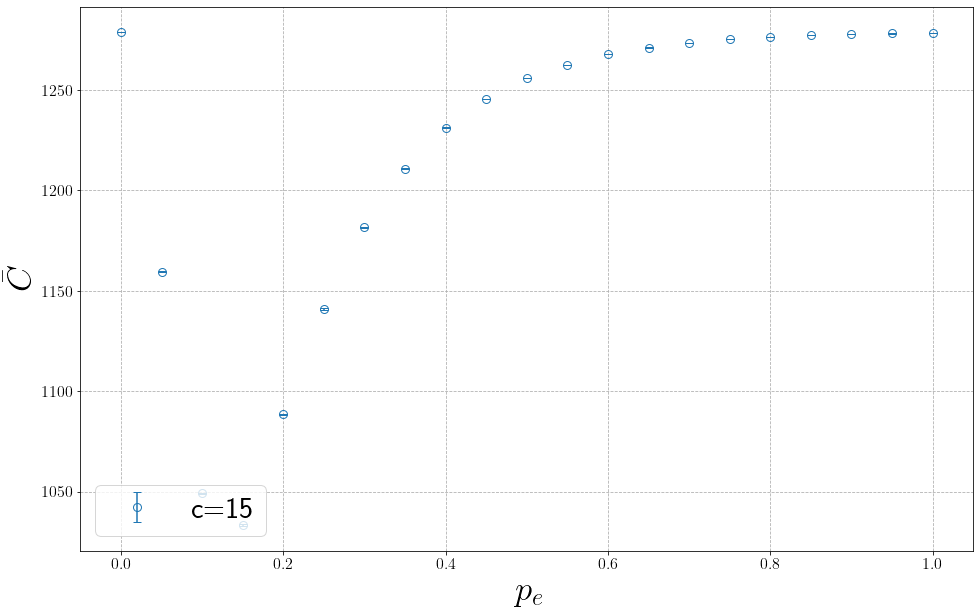

In [72]:
# reine Ergebnisse

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

algs = {'Schranke4b': r'Optimum', 'LP_Approx': 'LP Approximation', 'Greedy': 'Greedy'}

m, sme = data_vor_c[5000].calc_mean_alg_results()

# pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)
# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o']

for i, alg in enumerate(m.columns):
#     ax.scatter(d.index, d[alg], label=f'{algs[alg]}, N={n}')
#     ax.scatter(m.index, m[alg], label=f'{algs[alg]}')
    d = m.dropna(subset=[alg])
    smes = sme.dropna(subset=[alg])
    ax.errorbar(d.index, d[alg], yerr=smes[alg], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'c=15')

# ax.set_xlim([0.4, 0.6])
# ax.set_ylim([50, 60])

# ax.vlines(0.6355444309347226, 0, 520, color='black')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel('$\\bar{C}$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.legend(fontsize=30, loc='lower left')
# plt.savefig(os.path.join(plot_output_path, 'res_80_1sce.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

# hier gehts los

In [242]:
pv = r'D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\Vorauswertungen'
data_vor1, dic_lp1 = auswertung_ma.read_vorauswertung(pv, id='p', id_stelle=-2, read_lp=True)

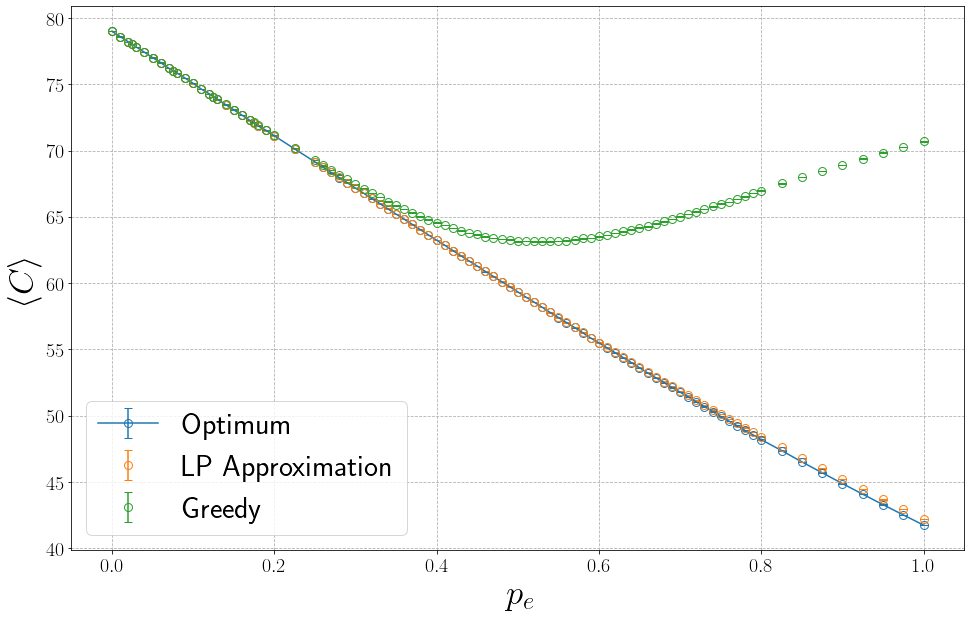

In [228]:
# reine Ergebnisse

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

n=80

algs = {'Schranke4b': r'Optimum', 'LP_Approx': 'LP Approximation', 'Greedy': 'Greedy'}

m, sme = data_vor1[n].calc_mean_alg_results()

# pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)
# fmts = ['v', '^', '<']
fmts = ['o-', 'o', 'o']

for i, alg in enumerate(m.columns):
#     ax.scatter(d.index, d[alg], label=f'{algs[alg]}, N={n}')
#     ax.scatter(m.index, m[alg], label=f'{algs[alg]}')
    d = m.dropna(subset=[alg])
    smes = sme.dropna(subset=[alg])
    ax.errorbar(d.index, d[alg], yerr=smes[alg], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'{algs[alg]}')

# ax.set_xlim([0.4, 0.6])
# ax.set_ylim([50, 60])

# ax.vlines(0.6355444309347226, 0, 520, color='black')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel('$\\langle C \\rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')
plt.savefig(os.path.join(plot_output_path, 'res_80_1sce.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

10
20
40
80
100
120
160
320
640
1280
2560


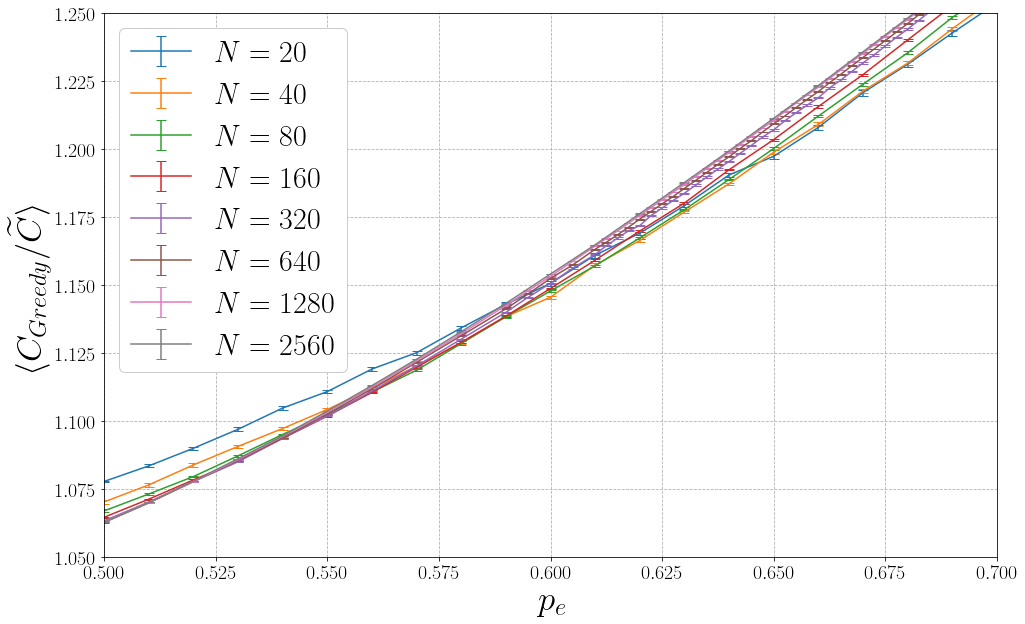

In [229]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor1.keys()):
    print(l)
    if l in [20, 40, 80, 160, 320, 640, 1280, 2560]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor1[l].id_values:

            if alg in data_vor1[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((0.5,0.7))
ax.set_ylim((1.05, 1.25))
plt.savefig(os.path.join(plot_output_path, 'pe_greedy_durch_bound_1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

10
20
40
80
100
120
160
320
640
1280
2560


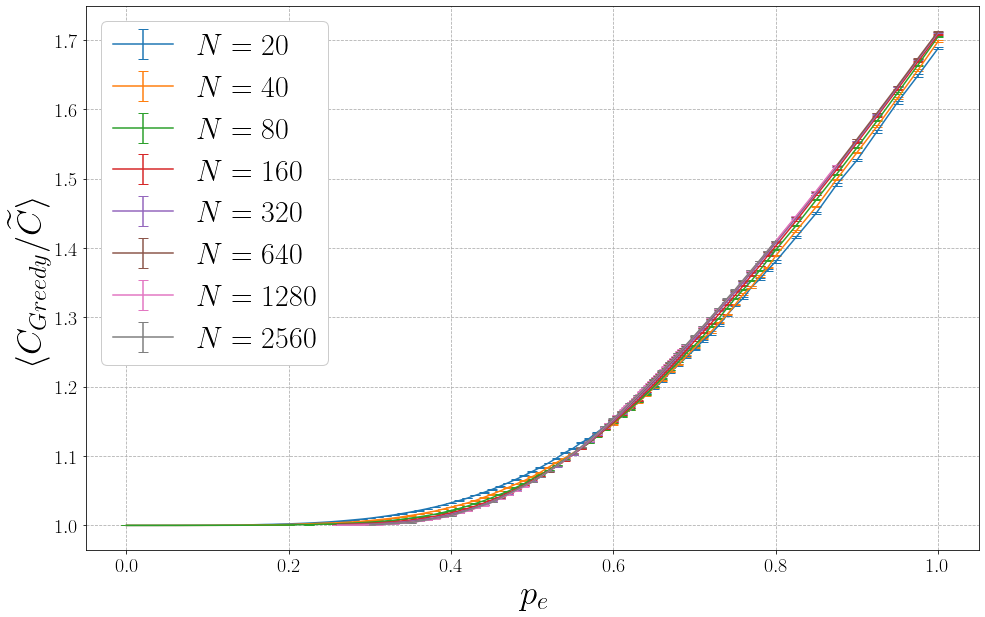

In [230]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor1.keys()):
    print(l)
    if l in [20, 40, 80, 160, 320, 640, 1280, 2560]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor1[l].id_values:

            if alg in data_vor1[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((0.5,0.7))
# ax.set_ylim((1.05, 1.25))
plt.savefig(os.path.join(plot_output_path, 'pe_greedy_durch_bound_1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

10
20
40
80
100
120
160
320
640
1280
2560


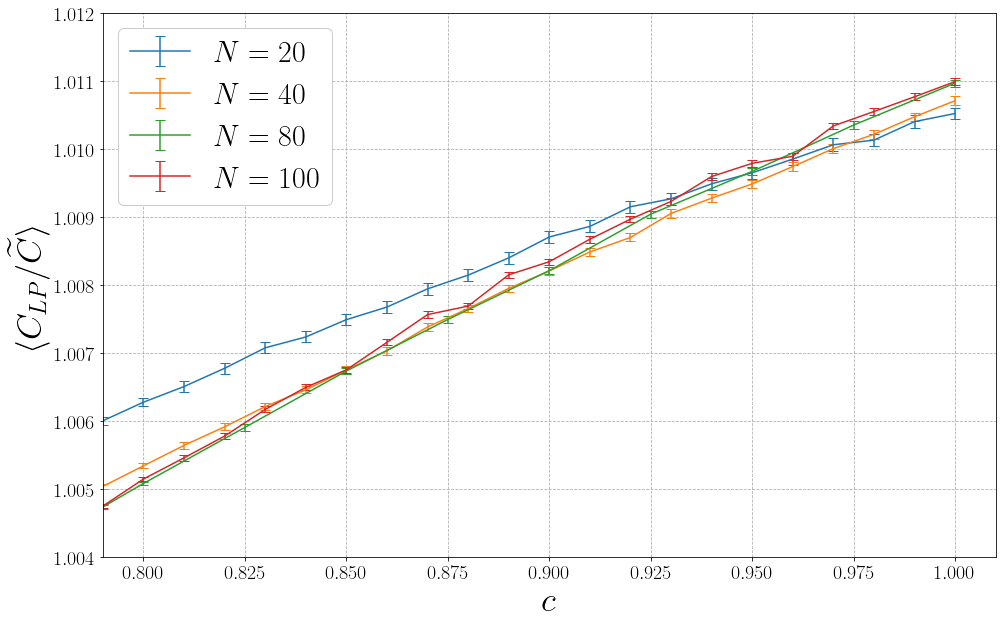

In [243]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor1.keys()):
    print(l)
    
    if l in [20, 40, 80, 100]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor1[l].id_values:

            if alg in data_vor1[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((0.79,1.01))
ax.set_ylim((1.004, 1.012))


plt.savefig(os.path.join(plot_output_path, 'pe_lp_durch_bound_1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

10
20
40
80
100
120
160
320
640
1280
2560


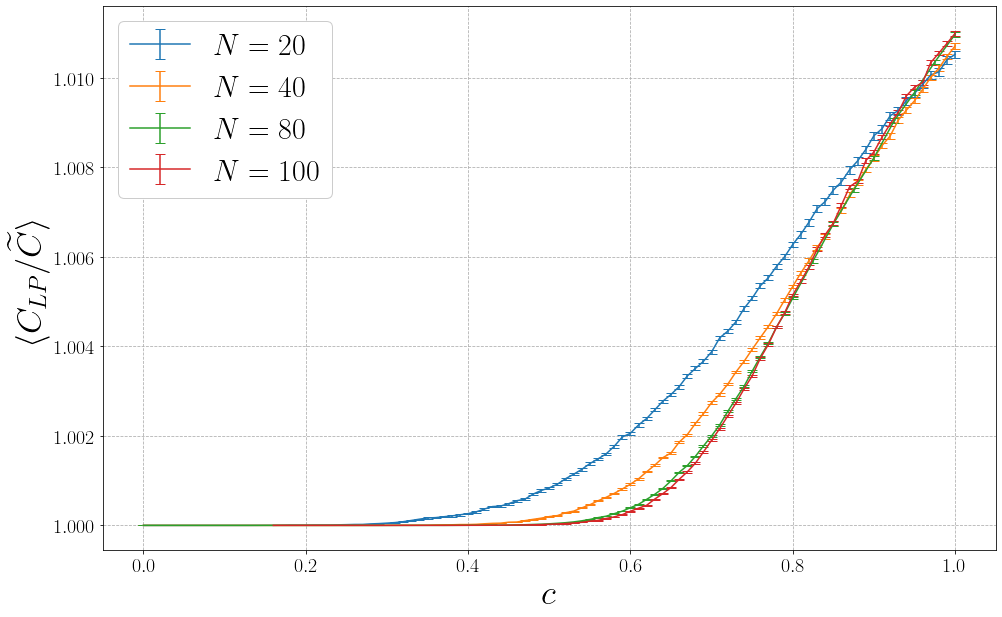

In [244]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor1.keys()):
    print(l)
    
    if l in [20, 40, 80, 100]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor1[l].id_values:

            if alg in data_vor1[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((2,5))
# ax.set_ylim((0.999, 1.025))


plt.savefig(os.path.join(plot_output_path, 'pe_lp_durch_bound_1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [7]:
dic_lp1[20]

,Anzahl_GGL,Summe_LPV,Summe_LPV0,Runs,Runs0,Anteil_GGL,Anteil_GLPV,Delta_Anteil_GGL,Delta_Anteil_GLPV,Anteil_GLPV0,Delta_Anteil_GLPV0
ids,,,,,,,,,,,
0.01,40000,40000.000000,40000.000000,40000,40000.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
0.02,40000,40000.000000,40000.000000,40000,40000.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
0.03,39997,39999.664242,39999.675566,40000,40000.0,0.999925,0.999992,0.000043,0.000014,0.999992,0.000014
0.04,39999,39999.838710,39999.903226,40000,40000.0,0.999975,0.999996,0.000025,0.000010,0.999998,0.000008
0.05,39996,39999.520164,39999.547132,40000,40000.0,0.999900,0.999988,0.000050,0.000017,0.999989,0.000017
...,...,...,...,...,...,...,...,...,...,...,...
0.96,10370,38029.926414,37256.505494,40000,40000.0,0.259250,0.950748,0.002191,0.001082,0.931413,0.001264
0.97,10124,38016.678199,37269.276353,40000,40000.0,0.253100,0.950417,0.002174,0.001085,0.931732,0.001261
0.98,10063,38013.637483,37291.558838,40000,40000.0,0.251575,0.950341,0.002170,0.001086,0.932289,0.001256


20
40
80
100


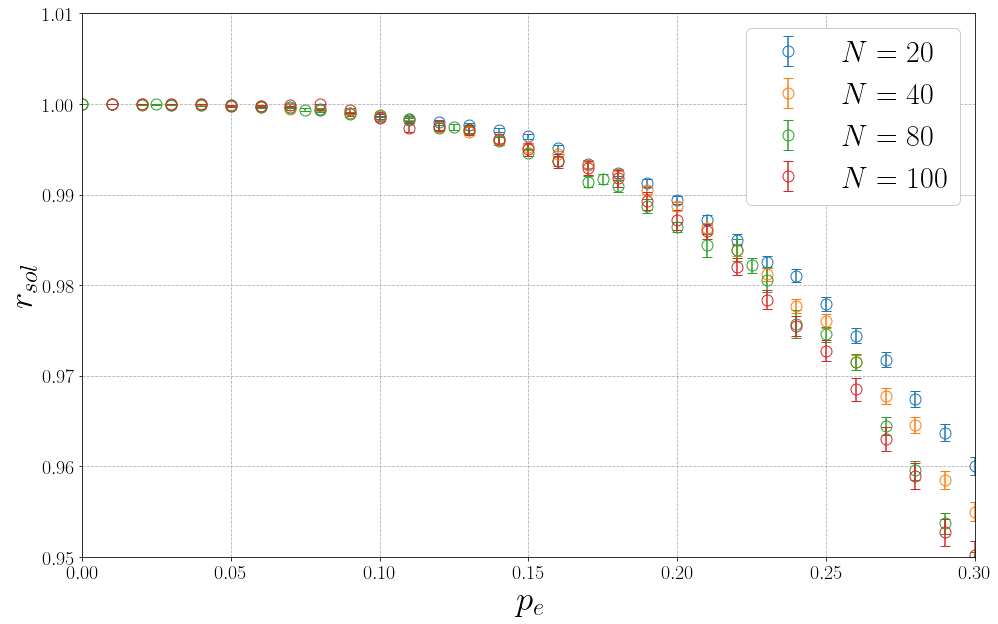

In [236]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in sorted(dic_lp1.keys()):
    
    if n != 120:
    
        print(n)
    
        ax.errorbar(dic_lp1[n].index, dic_lp1[n]['Anteil_GGL'], yerr=dic_lp1[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ r_{sol} $', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim([0, 0.3])
ax.set_ylim([0.95, 1.01])

plt.savefig(os.path.join(plot_output_path, 'pe_rsol1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
100
120


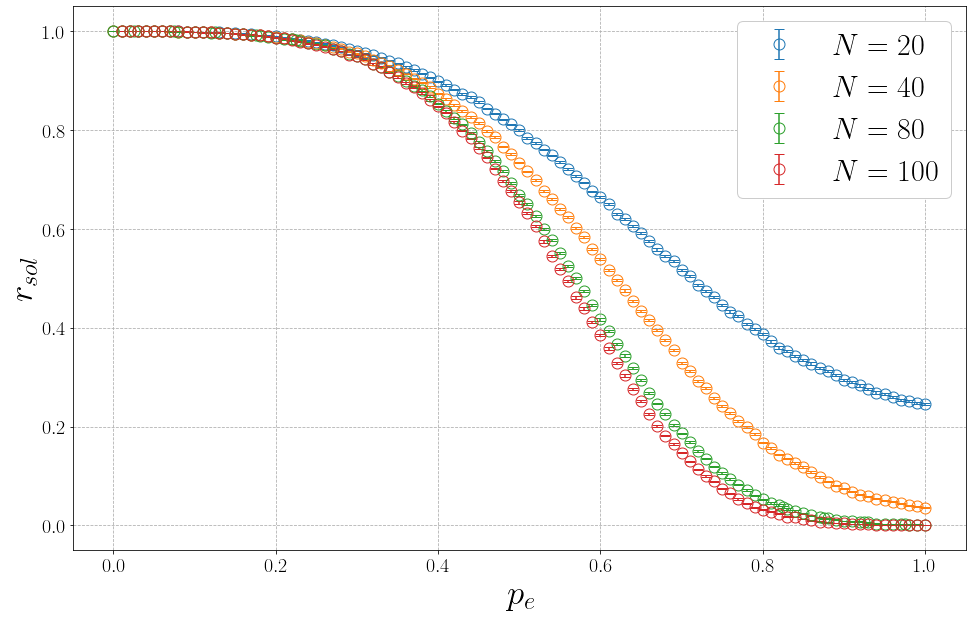

In [245]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in sorted(dic_lp1.keys()):
    print(n)
    
    if n!= 120:
        ax.errorbar(dic_lp1[n].index, dic_lp1[n]['Anteil_GGL'], yerr=dic_lp1[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ r_{sol}$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0, 0.3])
# ax.set_ylim([0.95, 1.01])

plt.savefig(os.path.join(plot_output_path, 'pe_rsol1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [47]:
dic_lp1[20]

,Anzahl_GGL,Summe_LPV,Summe_LPV0,Runs,Runs0,Anteil_GGL,Anteil_GLPV,Delta_Anteil_GGL,Delta_Anteil_GLPV,Anteil_GLPV0,Delta_Anteil_GLPV0
ids,,,,,,,,,,,
0.01,40000,40000.000000,40000.000000,40000,40000.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
0.02,40000,40000.000000,40000.000000,40000,40000.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
0.03,39997,39999.664242,39999.675566,40000,40000.0,0.999925,0.999992,0.000043,0.000014,0.999992,0.000014
0.04,39999,39999.838710,39999.903226,40000,40000.0,0.999975,0.999996,0.000025,0.000010,0.999998,0.000008
0.05,39996,39999.520164,39999.547132,40000,40000.0,0.999900,0.999988,0.000050,0.000017,0.999989,0.000017
...,...,...,...,...,...,...,...,...,...,...,...
0.96,10370,38029.926414,37256.505494,40000,40000.0,0.259250,0.950748,0.002191,0.001082,0.931413,0.001264
0.97,10124,38016.678199,37269.276353,40000,40000.0,0.253100,0.950417,0.002174,0.001085,0.931732,0.001261
0.98,10063,38013.637483,37291.558838,40000,40000.0,0.251575,0.950341,0.002170,0.001086,0.932289,0.001256


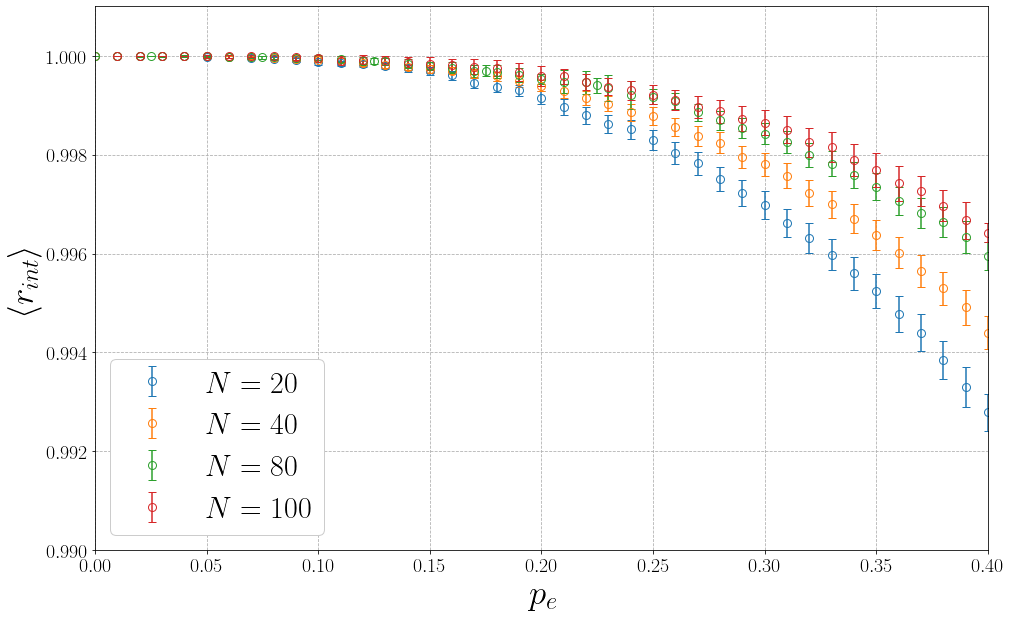

In [240]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']


for n in sorted(dic_lp1.keys())[:-1]:
    
#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
    ax.errorbar(dic_lp1[n].index, dic_lp1[n]['Anteil_GLPV'], yerr=dic_lp1[n]['Delta_Anteil_GLPV'], fmt=fmts[0], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim([0, 0.4])
ax.set_ylim([0.99, 1.001])

plt.savefig(os.path.join(plot_output_path, 'pe_rint1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

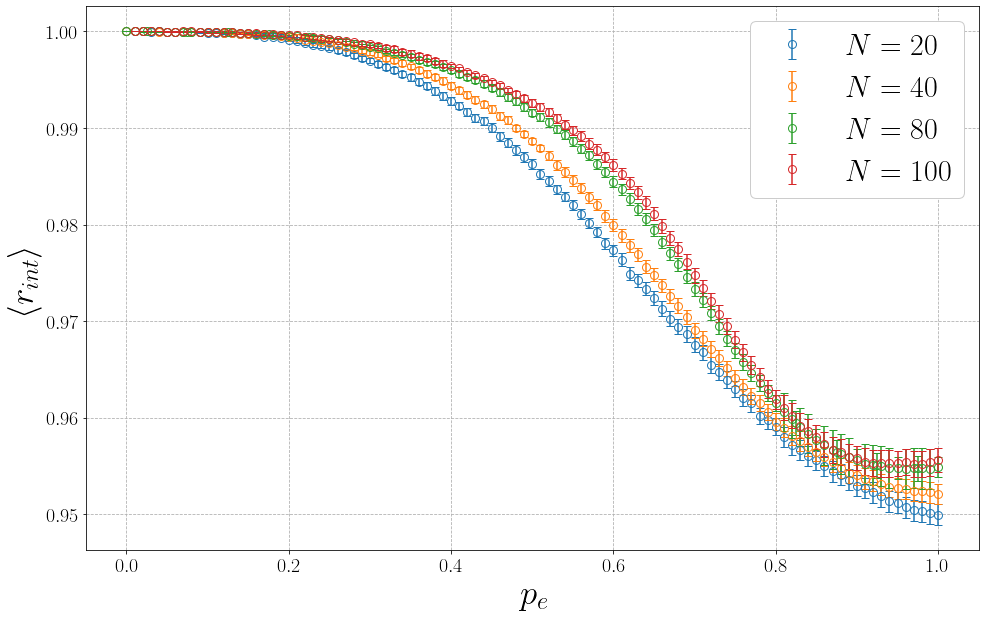

In [246]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']


for n in sorted(dic_lp1.keys())[:-1]:

#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
    ax.errorbar(dic_lp1[n].index, dic_lp1[n]['Anteil_GLPV'], yerr=dic_lp1[n]['Delta_Anteil_GLPV'], fmt=fmts[0], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')


plt.savefig(os.path.join(plot_output_path, 'pe_rint1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

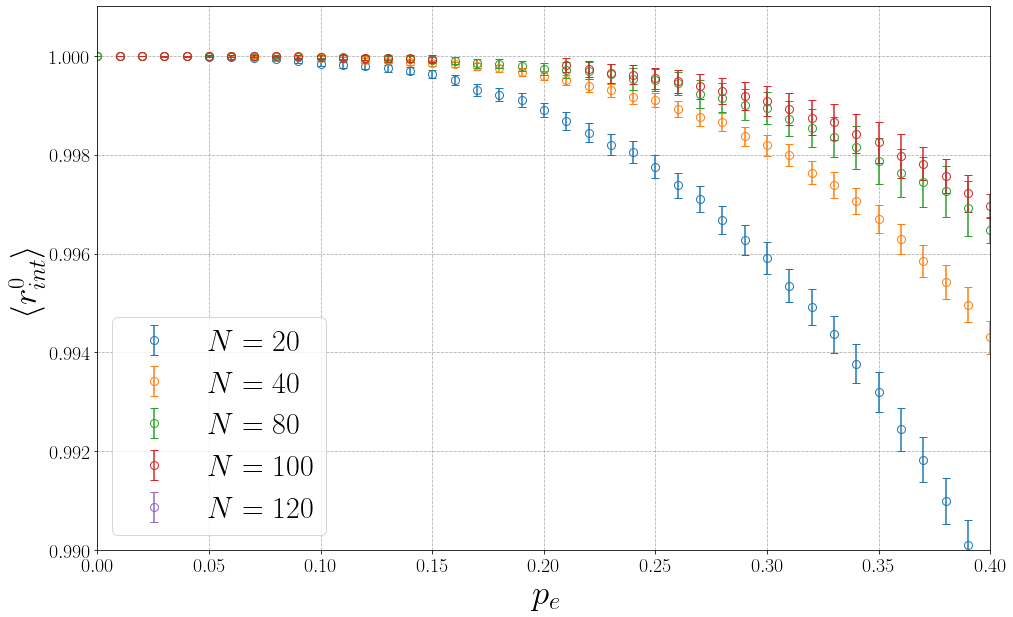

In [191]:
# Anteil ganzzahliger LP Variablen aus der ersten Stage

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o', 'o','o']

ns = sorted(dic_lp1.keys())

for i, n in enumerate(ns):
    
    if 'Delta_Anteil_GLPV0' in dic_lp1[n].columns:
    
        # subset, wo 'Anteil_GLPV0' auch vorhanden ist
        df_subset = dic_lp1[n].dropna(subset='Anteil_GLPV0')
    
        ax.errorbar(df_subset.index, df_subset['Anteil_GLPV0'], yerr=df_subset['Delta_Anteil_GLPV0'], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')
#         ax.errorbar(dic_lp[n].index, dic_lp[n]['Anteil_GLPV0'], yerr=dic_lp[n]['Delta_Anteil_GLPV0'], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')
#         ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV0'], label=f'N={n}')
        
# ax.set_xlim([0.4, 0.6])
# ax.set_ylim([50, 60])


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int}^0 \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')
              
ax.set_xlim([0, 0.4])
ax.set_ylim([0.99, 1.001])
              
plt.savefig(os.path.join(plot_output_path, 'pe_rint0_1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

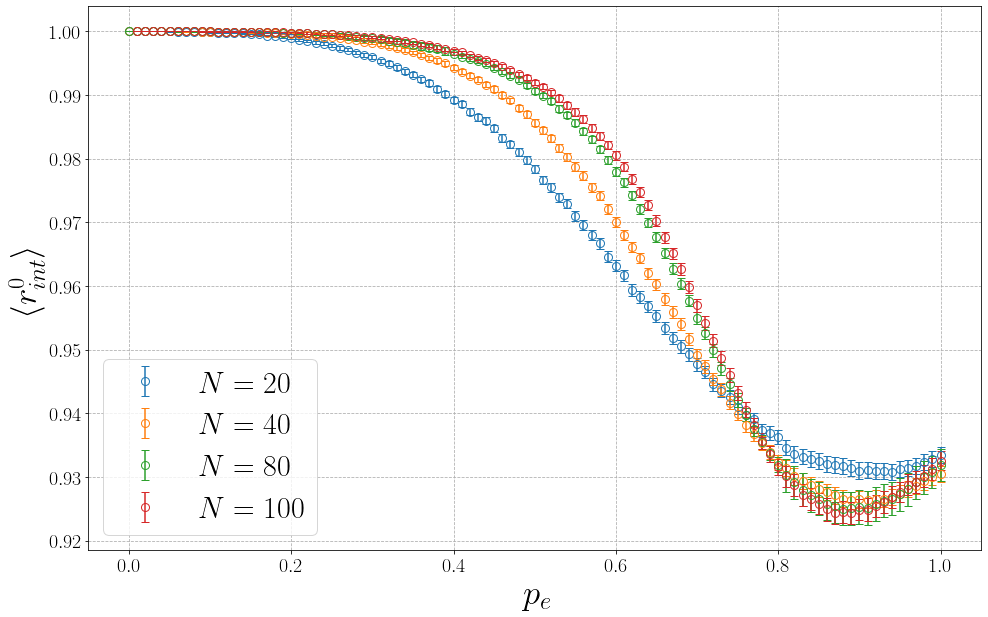

In [248]:
# Anteil ganzzahliger LP Variablen aus der ersten Stage

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o', 'o', 'o']

ns = sorted(dic_lp1.keys())

for i, n in enumerate(ns):
    
    if 'Delta_Anteil_GLPV0' in dic_lp1[n].columns and n!=120:
    
        # subset, wo 'Anteil_GLPV0' auch vorhanden ist
        df_subset = dic_lp1[n].dropna(subset='Anteil_GLPV0')
    
        ax.errorbar(df_subset.index, df_subset['Anteil_GLPV0'], yerr=df_subset['Delta_Anteil_GLPV0'], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')
#         ax.errorbar(dic_lp[n].index, dic_lp[n]['Anteil_GLPV0'], yerr=dic_lp[n]['Delta_Anteil_GLPV0'], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')
#         ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV0'], label=f'N={n}')
        
# ax.set_xlim([0.4, 0.6])
# ax.set_ylim([50, 60])


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int}^0 \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')
              
              
plt.savefig(os.path.join(plot_output_path, 'pe_rint0_1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

Sieht nach Uebergang aus

In [5]:
# lese vorausgewertete Daten ein
pv = r'D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\Vorauswertungen'
data1_vor = auswertung_ma.read_vorauswertung(pv, id='p', id_stelle=-2)

In [6]:
# data1_vor[320].id_values

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': [r"\usepackage{amsmath}"],
#     'text.font': {'family':'sans-serif','sans-serif':['Helvetica']},
})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
})
# plt.rc('text.latex', preamble=r'\usepackage{fourier}, \usepackage[T1]{fontenc}')

Gebe ich als fehler std an? oder standardfehler oder was? Ja, Standardfehler

In [129]:
data1_vor[80].raw_results[0.51]['Greedy'].std()

3.040034182119209

In [130]:
data1_vor[80].raw_results[0.51]['Greedy'].dropna().std()

3.040034182119209

In [137]:
np.sqrt(data1_vor[80].raw_results[0.51].count())

Schranke4b    265.329983
LP_Approx     265.329983
Greedy        142.828569
dtype: float64

In [139]:
data1_vor[80].raw_results[0.51].std() / np.sqrt(data1_vor[80].raw_results[0.51].count())

Schranke4b    0.012919
LP_Approx     0.012905
Greedy        0.021284
dtype: float64

Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

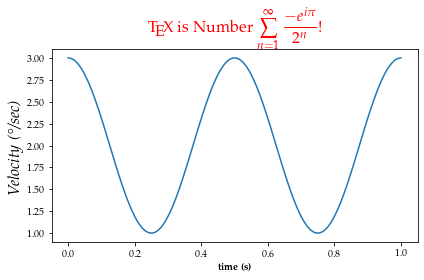

In [107]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

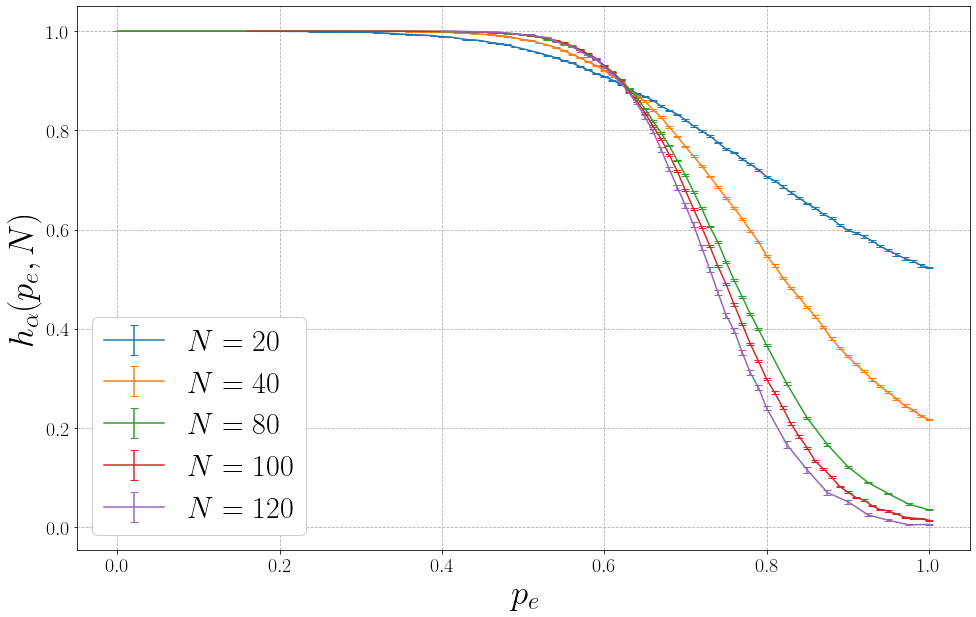

In [329]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.0
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

for n in sorted(pcs1.keys())[1:-1]:
    
    if n not in [160]:
        ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'$N={n}$')
    
ax.legend(fontsize=30, framealpha=1)

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(f'$h_\\alpha(p_e, N)$', fontsize=axislabelsize)

# ax.set_xlim([0.4,.81])
# ax.set_ylim([0.6, 1.02])

# ax.set_xlim([0.395, 0.805])
# ax.set_ylim([0.35, 1.02])

# ax.set_ylim([0.85, 1.02])

# ax.text(0.51, 0.39, f"LP, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)


# ax.set_xlim([0.39,.65])
# ax.set_ylim([0.86, 1.02])
# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

plt.savefig(os.path.join(plot_output_path, f'pe_lp_h_{alpha}_1.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

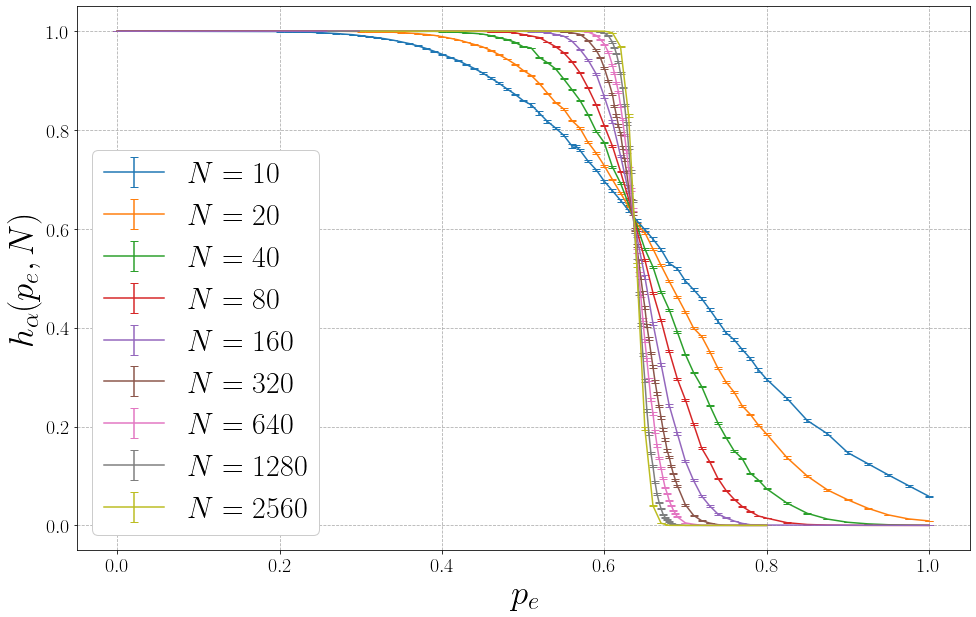

In [177]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    if n not in [100,120]:
        ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'$N={n}$')
#     ax.scatter(pcs1[n].ids, pcs1[n].props)


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(f'$h_\\alpha(p_e, N)$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1, loc='lower left')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0.295, 0.805])
# ax.text(0.45, 0.02, f"Greedy, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)
# alpha = 1.2
# ax.set_xlim([0.6,.66])
# ax.set_ylim([0.8, 1.02])

# alpha = 1.1
# ax.set_xlim([0.53, 0.58])
# ax.set_ylim([0.4, 0.8])

plt.savefig(os.path.join(plot_output_path, f'pe_greedy_h_{alpha}_1.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

plotte die Werte mit den neuen Achsen:

In [155]:
# die Daten fuer fssa abspeichern

from functools import reduce

def prepare_fssa(ls, pcs, ordnername):
    
    p = os.path.join(r'D:\Uni\Masterarbeit\Daten\fssa', ordnername)
    
    # kann nur id werte nehmen, die fuer alle L vorliegen
    common_ids = sorted(reduce(lambda a, b : a.intersection(b), [set(pcs[l].ids) for l in ls]))
    
    # a und da bauen
    al = []
    dal = []
    
    for l in ls:
        # gehe alle eigenen IDs durch und fuege zum selben Index die entsprechenden Werte (props, std_dev) hinzu, falls
        # die id auch in den common_ids vorkommt, sonst nicht
        al.append([pcs[l].props[i] for i, ii in enumerate(pcs[l].ids) if ii in common_ids])
        dal.append([pcs[l].std_dev[i] for i, ii in enumerate(pcs[l].ids) if ii in common_ids])
        
    # alles abspeichern
    np.savetxt(os.path.join(p, 'l.txt'),  np.array(sorted(ls)))
    np.savetxt(os.path.join(p, 'rho.txt'),  np.array(sorted(common_ids)))
    
    np.savetxt(os.path.join(p, 'a.txt'), np.array(al))
    np.savetxt(os.path.join(p, 'da.txt'), np.array(dal))
    
    print(common_ids)

In [183]:
alpha=1.3
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

l = [160, 320, 640, 1280, 2560]
# l = [20, 40, 80]

print(prepare_fssa(l, pcs1, f'alpha_{alpha}_160-2560'))

[0.3, 0.35, 0.4, 0.45, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8]
None


In [199]:
alpha=1.01
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

# l = [160, 320, 640, 1280, 2560]
l = [20, 40, 80, 100, 120]

print(prepare_fssa(l, pcs1, f'lp_alpha_{alpha}_20-120'))

[0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.85, 0.9, 0.95, 1.0]
None


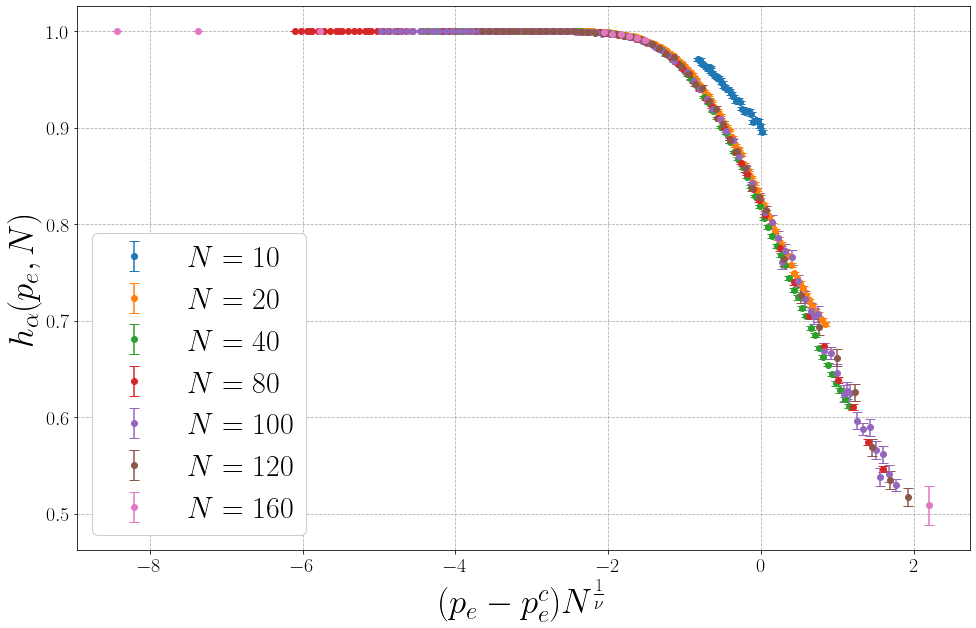

In [202]:
fig, ax = plt.subplots(figsize=(16,10))
# 1.2
# nu = 1.9904038527486416
# zeta = -0.001893205514896505
# krit = 0.6355444309347226

# 1.1
# nu = 1.9658861899838602
# zeta =-0.0015942810030053344
# krit = 0.5440240471699048

# ab 320 1.2:
nu = 2.14734662846475
# zeta = 0.6366414017700357
krit = 0.792827846690527

alpha=1.01
alg='LP_Approx'


pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
#     if n >= 40:
#     ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) * n ** (-1 * zeta/nu) , label=f'N={n}')
#         ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) , label=f'$N={n}$')
        ax.errorbar((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props), pcs1[n].std_dev, fmt='o', capsize=capsize, label=f'$N={n}$')
    
ax.set_xlabel(r"$(p_e - p_e^{c}) N^{\frac{1}{\nu}}$", fontsize=axislabelsize)
# ax.set_ylabel(r"$p(p_k,N) N^{\frac{-\zeta}{\nu}}$", fontsize=18)
ax.set_ylabel(r"$h_\alpha(p_e,N)$", fontsize=axislabelsize)
# ax.set_xlim((-8.1, 4.1))


ax.legend(fontsize=30, framealpha=1, loc='lower left')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# plt.savefig('kollaps_greedy_1sc.png', dpi=300, facecolor=[1,1,1,1])
# plt.savefig(os.path.join(plot_output_path, f'pe_greedy_kollaps_{alpha}_1.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

(-8.1, 4.1)

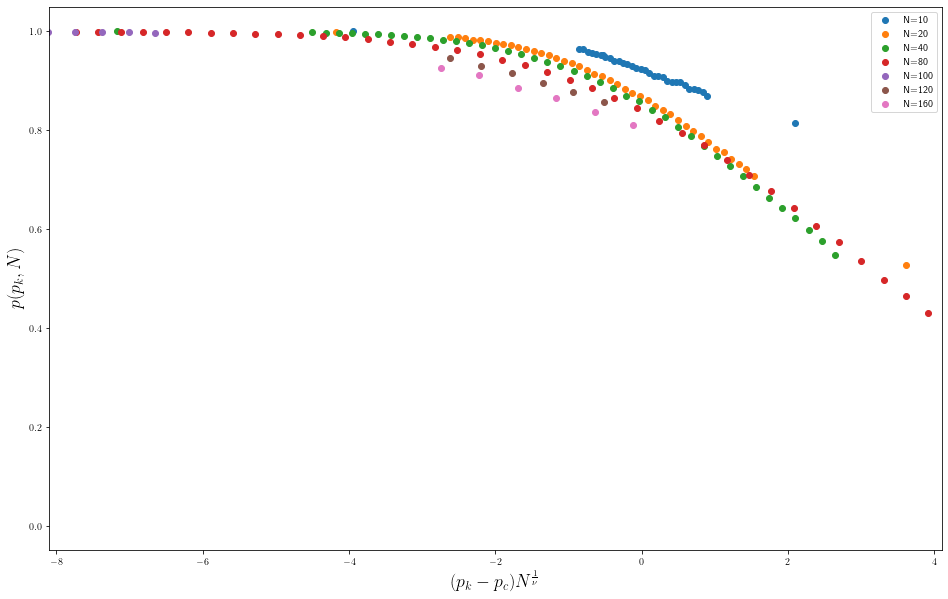

In [99]:
fig, ax = plt.subplots(figsize=(16,10))
# 1.0, 20, 40, 80
nu = 1.2802706789181413
zeta = -0.027028800383226366
krit = 0.652133839959258

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)

for n in sorted(pcs1.keys()):
#     if n >= 320:
#     ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) * n ** (-1 * zeta/nu) , label=f'N={n}')
        ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) , label=f'N={n}')
    
ax.legend()
ax.set_xlabel(r"$(p_k - p_c) N^{\frac{1}{\nu}}$", fontsize=18)
# ax.set_ylabel(r"$p(p_k,N) N^{\frac{-\zeta}{\nu}}$", fontsize=18)
ax.set_ylabel(r"$p(p_k,N)$", fontsize=18)
ax.set_xlim((-8.1, 4.1))

# plt.savefig('kollaps_greedy_1sc.png', dpi=300, facecolor=[1,1,1,1])

In [65]:
pcs1[40].props[13]

0.7744

In [52]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

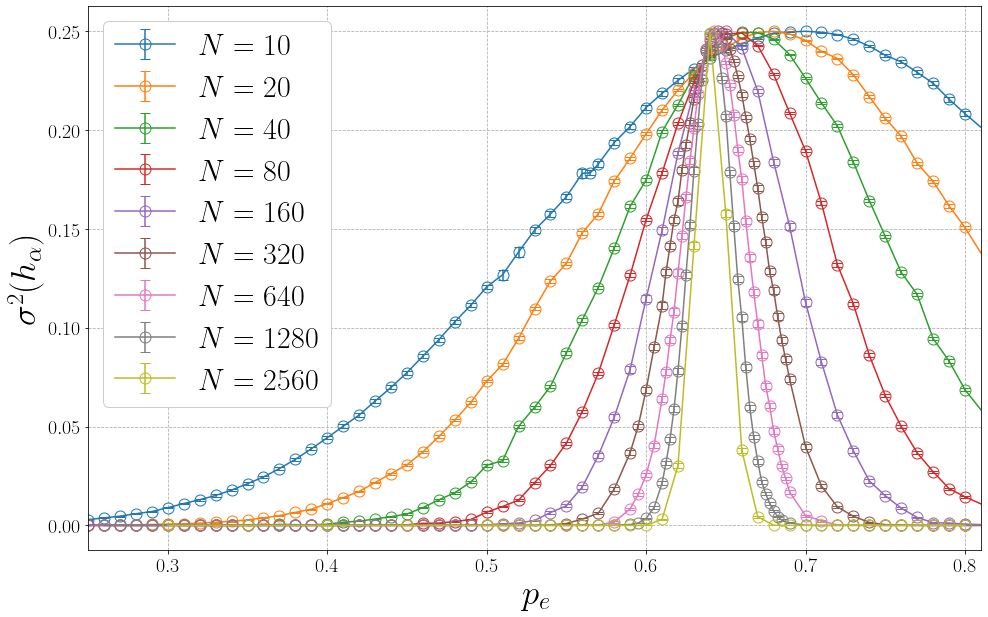

In [254]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    if n in [10, 20, 40, 80, 160, 320, 640, 1280, 2560]:
    
        ax.errorbar(pcs1[n].ids, pcs1[n].var, yerr=pcs1[n].delta_var, fmt='o-', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')
#     ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(f'$\\sigma^2(h_\\alpha)$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
ax.legend(fontsize=30, framealpha=1)


ax.set_xlim([0.25, 0.81])
# ax.set_ylabel(f'Anteil aller Problemstellungen bei denen Greedy {alpha} $\cdot$ Schranke4b erreicht')


plt.savefig(os.path.join(plot_output_path, f'pe_var_greedy_1_1.2.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

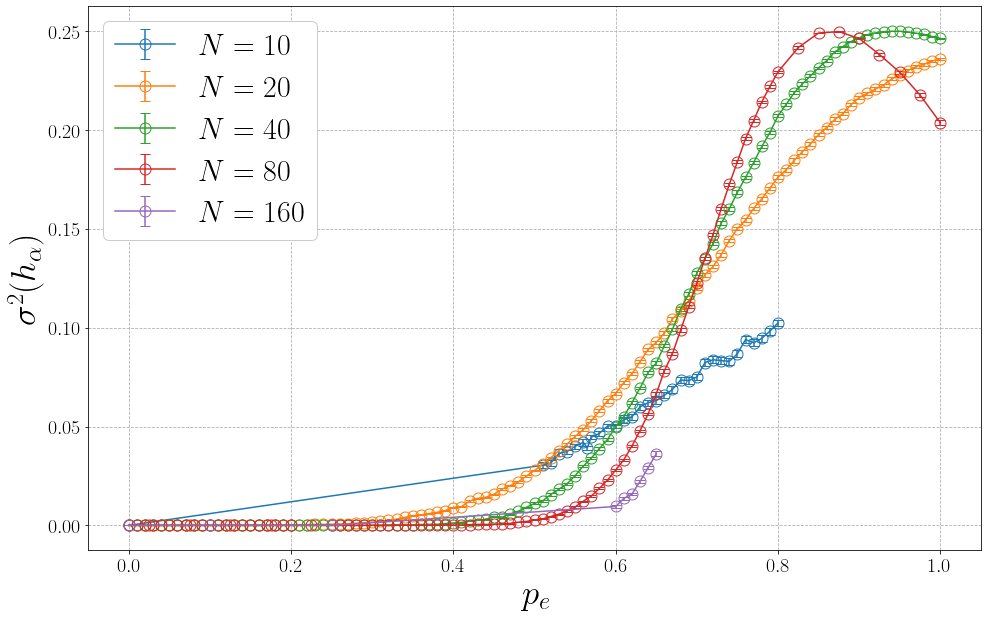

In [281]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.005
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    if n in [10, 20, 40, 80, 160, 320, 640, 1280, 2560]:
    
        ax.errorbar(pcs1[n].ids, pcs1[n].var, yerr=pcs1[n].delta_var, fmt='o-', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')
#     ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(f'$\\sigma^2(h_\\alpha)$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
ax.legend(fontsize=30, framealpha=1)


# ax.set_xlim([0.25, 0.81])
# ax.set_ylabel(f'Anteil aller Problemstellungen bei denen Greedy {alpha} $\cdot$ Schranke4b erreicht')


# plt.savefig(os.path.join(plot_output_path, f'pe_var_greedy_1_1.2.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

 N = 20; Max: 0.941937810972961
 N = 40; Max: 0.8392210006052055
 N = 80; Max: 0.7663602850362023
 N = 100; Max: 0.749361527196105
 N = 120; Max: 0.7366780281800784
[ 20  40  80 100 120]
[0.61812175 1.75548706 1.77574515]
[0.00866908 0.10786913 0.08685736]


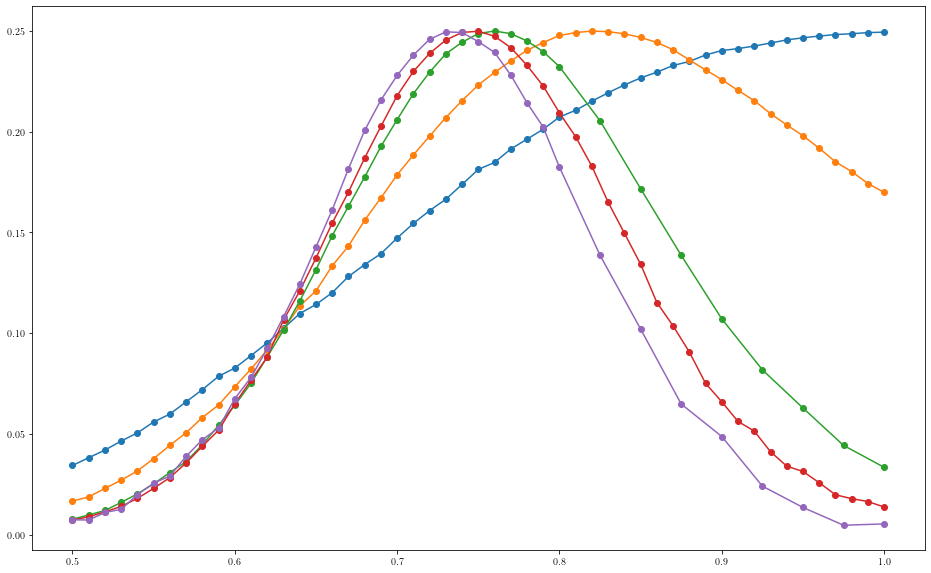

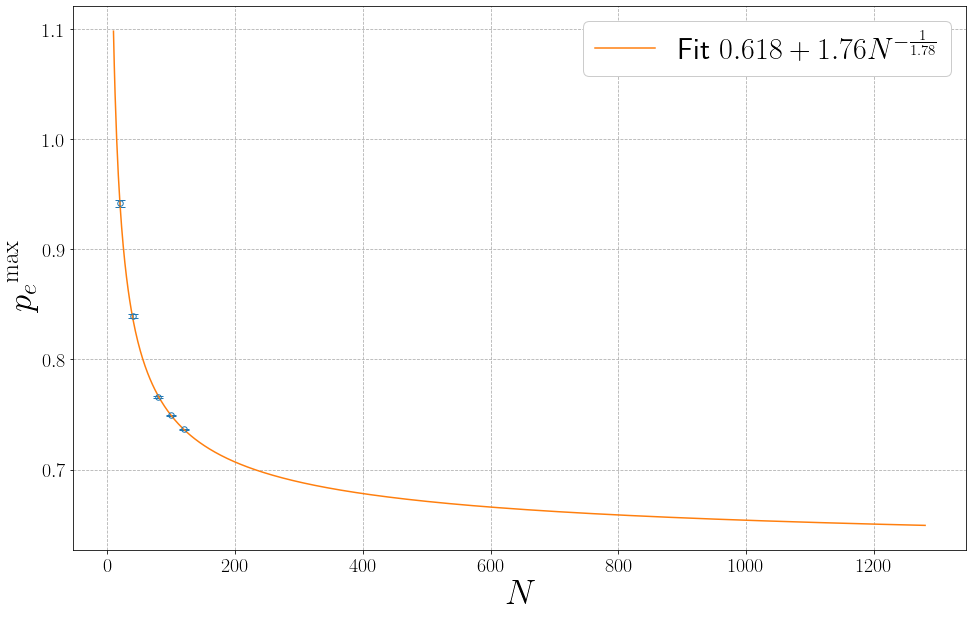

In [292]:
alpha=1.0
alg='LP_Approx'

u, o = 0.5, 1.
# lege Intervalle fest innerhalb welcher ich den gauss fit machen will
# ints = {10: [0.5, 0.8], 20: [0.5,0.8], 40: [0.51, 0.8], 80: [0.5, 0.8], 160: [0.3, 0.8], 320: [0.3, 0.8], 640: [0.3, 0.75], 1280: [0.3, 0.8]}
ints = {10: [u, o], 20: [u,o], 40: [u, o], 80: [u, o], 100: [u, o], 120: [u, o], 160: [u, o], 320: [u, o], 640: [u, o], 1280: [u, o]}


def var_fit(N, xkrit, b, nu):
    return xkrit + b * N ** (-1/nu)

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data_vor1, alg, alpha)

popts = []
delta_popts = []

fig, ax = plt.subplots(figsize=(16,10))
for n in [20, 40, 80, 100, 120]:#, 80, 160, 320, 640, 1280, 2560]:
    
    
    
    indices = (ints[n][0] <= np.array(pcs1[n].ids)) & (np.array(pcs1[n].ids) <= ints[n][1])
    ii, vv = np.array(pcs1[n].ids)[indices], np.array(pcs1[n].var)[indices]
    
    dd = np.array(pcs1[n].delta_var)[indices]
    
    ax.plot(ii, vv, 'o-', label=f"$N={n}$")
    
    popt, pcov = curve_fit(gauss, ii, vv, p0=(0, 0,2), maxfev=100000)
    
    popts.append(popt[0])
    delta_popts.append(np.sqrt(np.diag(pcov))[0])
    
    print(f" N = {n}; Max: {popt[0]}")
    
    
nnnsss = np.array([20, 40, 80, 100, 120])


#### ANGEBEN, WELCHE WERTE ICH BENUTZEN WILL
J = 0
print(nnnsss[J:])

popt, pcov = curve_fit(var_fit, nnnsss[J:], np.array(popts)[J:], sigma=np.array(delta_popts)[J:], p0=(0.5, 0, 2), maxfev=100000)
print(popt)
print(np.sqrt(np.diag(pcov)))

fig, ax = plt.subplots(figsize=(16,10))

ns = [20, 40, 80, 100, 120]

fmts = ['.', '.', '.', '.']

# for i, n in enumerate(ns):
    
ax.errorbar(ns, popts, yerr=delta_popts, fmt='.', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor)

ns2 = np.linspace(10, 1280, 1000)

ax.plot(ns2, var_fit(ns2, *popt), label=f'Fit ${popt[0]:.3} + {popt[1]:.3} N^{{-\\frac{1}{{{popt[2]:.3}}}}}$')

ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(f'${{p_e}}^{{\\max}}$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0.295, 0.805])
# ax.text(0.45, 0.02, f"Greedy, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)
# alpha = 1.2
# ax.set_xlim([0.6,.66])
# ax.set_ylim([0.8, 1.02])

# alpha = 1.1
# ax.set_xlim([0.53, 0.58])
# ax.set_ylim([0.4, 0.8])

# plt.savefig(os.path.join(plot_output_path, f'pemax_greedy_1_{alpha}.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

Will fuer den Fit der Gauss glocke mindestens 15 Werte um das Peak drumrum

Das Peak der Varianz wandert nach links

In [98]:
def gauss(x, x_max, A, B):
    return A * np.exp(-1 * (x - x_max) ** 2 / B)

In [99]:
from scipy.optimize import curve_fit

0.6413117989507521 0.2488771017823022 0.00039420294420269456


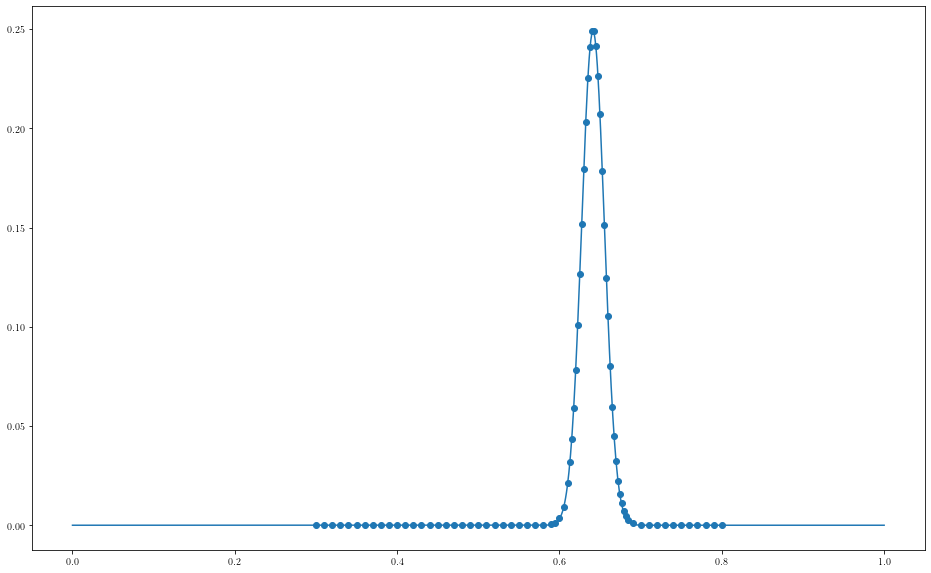

In [63]:
fig, ax = plt.subplots(figsize=(16,10))
# gauss glocke fitten
x10, y10 = ii, vv
ax.scatter(x10, y10)

popt, pcov = curve_fit(gauss, x10, y10, maxfev=100000)
xs = np.linspace(0, 1, 1000)

ax.plot(xs, gauss(xs, *popt))
print(*popt)
# ax.plot(xs, gauss(xs, 2, .4, 5))

0.6792786981535617 0.24937532239888843 0.027867744313754182


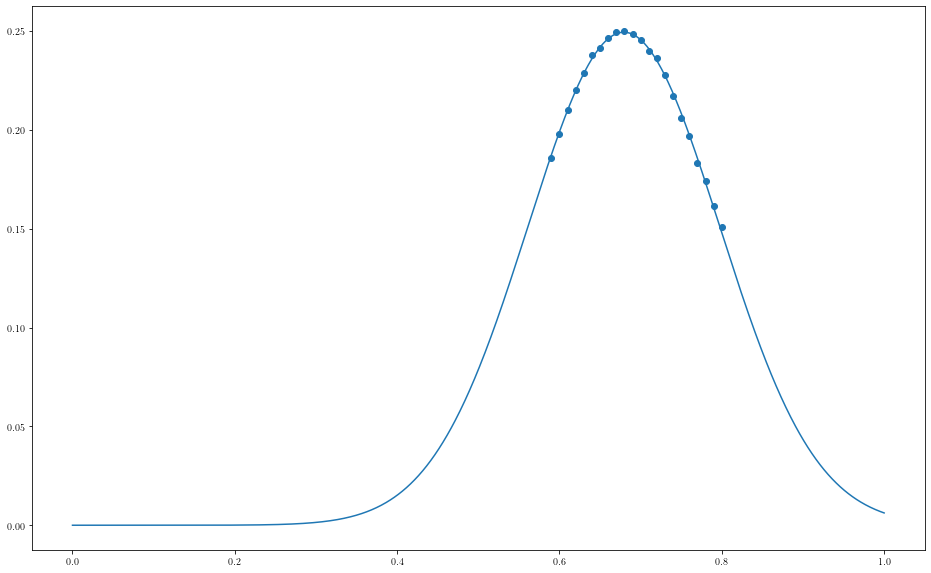

In [33]:
fig, ax = plt.subplots(figsize=(16,10))
# gauss glocke fitten
x10, y10 = pcs1[20].ids[39:-1], pcs1[20].var[39:-1]
ax.scatter(x10, y10)

popt, pcov = curve_fit(gauss, x10, y10, maxfev=100000)
xs = np.linspace(0, 1, 1000)

ax.plot(xs, gauss(xs, *popt))
print(*popt)
# ax.plot(xs, gauss(xs, 2, .4, 5))

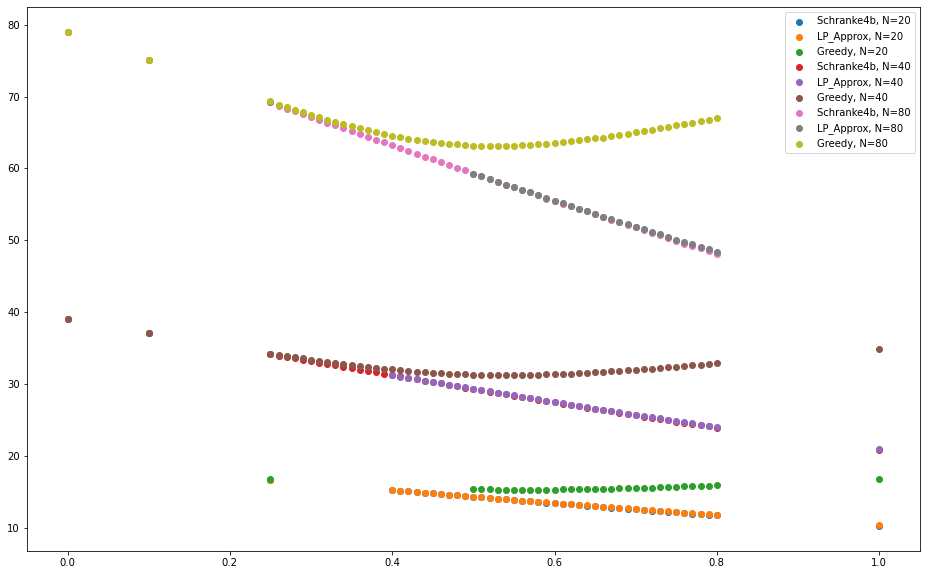

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))

ns = [20, 40, 80]#, 160, 320, 640, 1280, 2560]
for n in ns:

    d160_alg_results = data1_vor[n].calc_mean_alg_results()
    for alg in d160_alg_results.columns:
        ax.scatter(d160_alg_results.index, d160_alg_results[alg], label=f'{alg}, N={n}')
    ax.legend()
# ax.set_xlim([1.9, 3.1])

# ax.vlines(0.6355444309347226, 0, 520, color='black')

Die vline die eingezeichnet ist, zeigt den kritischen Wert an, den man erhält, wenn man Alpha auf 1.2 setzt

ich bin der Meinung, dass ich das alpha beliebig verschieben kann und immer einen Übergang bekomme, weil sich die Greedy-Ergebnisse von der Schranke immer ab einem gewissen Punkt abspalten. Je größer die Systeme werden, desto größer auch die Abstände, aber prozentual gesehen bleibt das ja gleich, wenn ich mir die proportion-Werte anschaue.

Der LP-Alg ist hier für diese Problemstellung eigentlich immer ziemlich stark

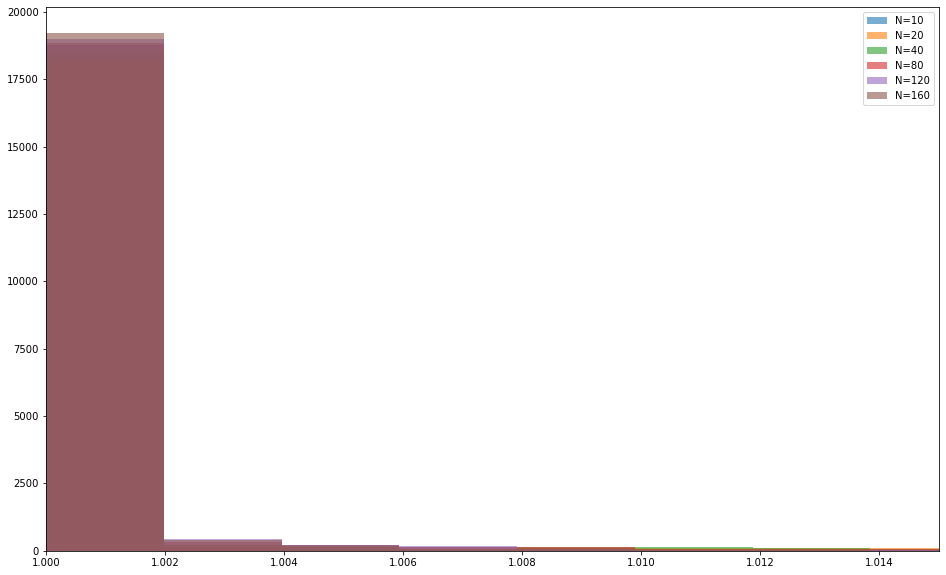

In [13]:
ns = [10,20,40,80,120,160]
l = [data1_vor[n] for n in ns]

# for r in l:
#     print(r.id_values)

auswertung_ma.plot_hist_alg_vs_schranke(l, ns, 'LP_Approx', 0.61, xlim_max=1.015)

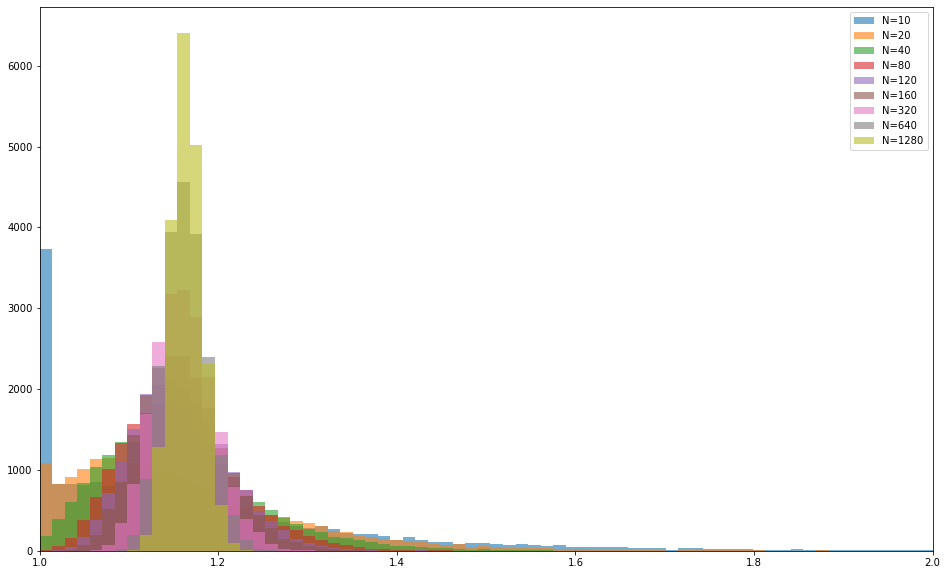

In [14]:
ns = [10,20,40,80,120,160,320, 640, 1280]
l = [data1_vor[n] for n in ns]

# for r in l:
#     print(r.id_values)

auswertung_ma.plot_hist_alg_vs_schranke(l, ns, 'Greedy', 0.61, xlim_max=2)

[1.2596780138182786, 1.2724793922937916, 1.273417219357322, 1.2739842242754762]


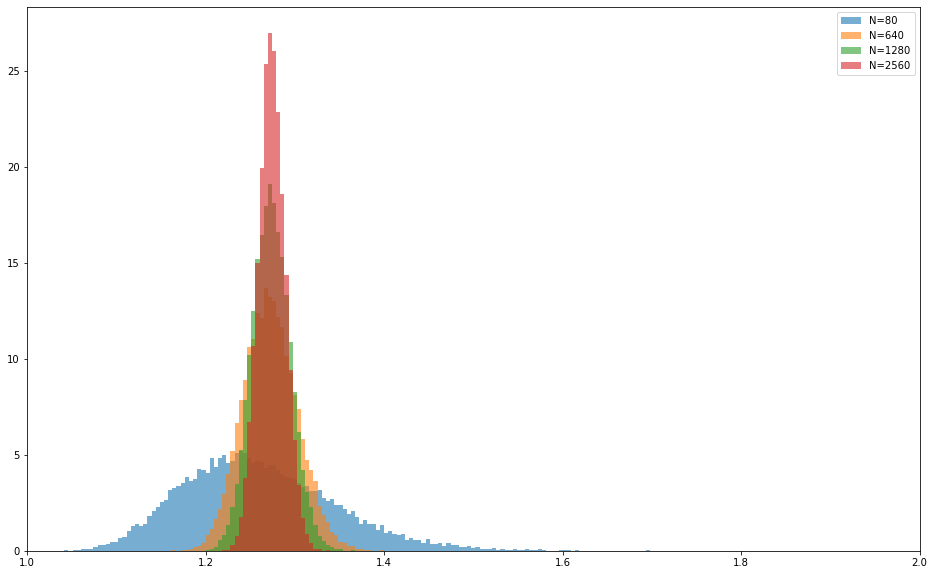

In [15]:
ns = [80, 640, 1280, 2560]
l = [data1_vor[n] for n in ns]

# for r in l:
#     print(r.id_values)

ax = auswertung_ma.plot_hist_alg_vs_schranke(l, ns, 'Greedy', 0.7, xlim_max=2, density=True)

die Verteilung der Verhältnisse werden immer schmaler. Das gilt jeweils für einen ID-Wert, hier $p_k = 0.61$. Und irgendwann sind die so schmal, dass kein Wert mehr oberhalb der Schranke multipliziert mit Alpha liegt.

NOCHMAL ID-WERTE UNTER- UND ÜBERHALB DER KRITISCHEN WERTE VERGLEICHEN 

# berechne (schaetze) Schnittpunkt von zwei Kurven

In [8]:
from shapely.geometry import LineString
a = np.arange(10)
a2 = np.linspace(2,10,7)
b = np.linspace(5,6,10)
b = [4.9, 6, 5.4, 5.6, 5.7, 6.1, 5.1, 7.0, 5.4, 4.9]
c = np.linspace(6, 5.7, 7)

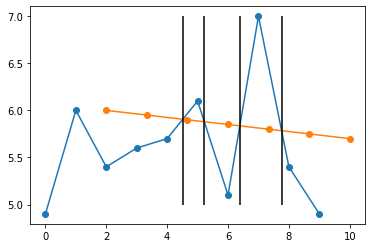

In [9]:
first_line = LineString(np.column_stack((a, b)))
second_line = LineString(np.column_stack((a2, c)))
intersection = first_line.intersection(second_line)

fig, ax = plt.subplots()
ax.plot(a,b, '-o')
ax.plot(a2,c, '-o')

for point in intersection.geoms:
    ax.vlines(point.x, 5, 7, colors='black')

Laeuft so, ist als Fkt. in auswertung.py implementiert

## berechne die Schnittpunkte der verschiedenen Kurven

In [6]:
ns = sorted(d_ids.keys())

schnittpunkte = []

for i, n in enumerate(ns[:-1]):
    schnittpunkte.append(auswertung_ma.calc_schnittpunkte(d_ids[n], d_props[n], d_ids[ns[i+1]], d_props[ns[i+1]]))

In [7]:
schnittpunkte

[None,
 (0.6289999999999999, 0.8853360000000001),
 (0.6346451612903226, 0.877338193548387),
 ([0.5672937293729371,
   0.5814525139664803,
   0.5124489795918368,
   0.5226618705035971,
   0.5729726899218562],
  [0.9653960396039605,
   0.9525782122905029,
   0.9887755102040816,
   0.9863309352517986,
   0.9611955208249414])]

In [16]:
i = auswertung_ma.calc_schnittpunkte(d_ids[40], d_props[40], d_ids[80], d_props[80])
print(i)

GEOMETRYCOLLECTION (LINESTRING (0 1, 0.1 1), LINESTRING (0.1 1, 0.25 1), POINT (0.6052723112128147 0.9163505720823798))


In [20]:
import shapely

In [12]:
for geo in i.geoms:
    print(geo)

LINESTRING (0 1, 0.1 1)
LINESTRING (0.1 1, 0.25 1)
POINT (0.6052723112128147 0.9163505720823798)


In [23]:
a = shapely.geometry.GeometryCollection([i.geoms[2]])

In [24]:
print(a)

GEOMETRYCOLLECTION (POINT (0.6052723112128147 0.9163505720823798))


In [26]:
[g for g in i.geoms if not isinstance(g, shapely.geometry.LineString)]

In [7]:
data1[80].calc_statistic_size()

,stat_size
ids,
0.00,200
0.10,400
0.25,600
0.50,4600
0.51,400
0.52,400
0.53,400
0.54,4000
0.55,4400


In [1]:
pt = r'D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\KFC2_80_nodes_1_scenarios'
%run D:\uni\Masterarbeit\Code\auswertung\vorauswertung.py D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\KFC2_80_nodes_1_scenarios p -2

Namespace(path_HO='D:\\Uni\\Masterarbeit\\Daten\\KFC2\\1_scenario\\KFC2_80_nodes_1_scenarios', id='p', id_index=-2, read_tracking=False, read_lp=False)
Lese die TrackingDaten ein...
fertig!


# 2 Szenarien
Ich muss mir auch nochmal die LP-Variablen anschauen, ob ich da auch einen Übergang sehe!

In [136]:
data2 = {}
p2 = r"D:\Uni\Masterarbeit\Daten\KFC2\2_scenarios"

for ho in os.listdir(p2):

    if not 'Vorauswertung' in ho:
        n = int(ho.split("_")[1])
        data2[n] = auswertung_ma.Read_HO(os.path.join(p2, ho), 'p', -2, read_tracking=False, read_lp=False)
        
# lese vorausgewertete Daten ein
pv2 = r'D:\Uni\Masterarbeit\Daten\KFC2\2_scenarios\Vorauswertungen'

data2_vor = auswertung_ma.read_vorauswertung(pv2, id='p', id_stelle=-2)

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


In [110]:
# data2_vor[80].calc_statistic_size()

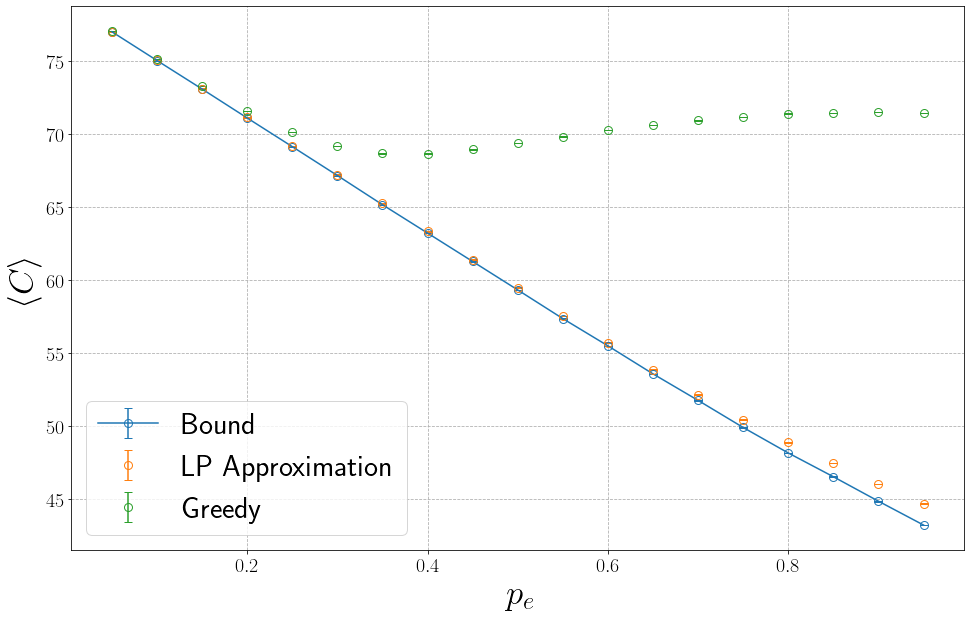

In [316]:
# reine Ergebnisse

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

n=80

algs = {'Schranke4b': r'Bound', 'LP_Approx': 'LP Approximation', 'Greedy': 'Greedy'}

m, sme = data2_vor[n].calc_mean_alg_results()

# pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)
fmts = ['v', '^', '<']
fmts = ['o-', 'o', 'o']

for i, alg in enumerate(m.columns):
#     ax.scatter(d.index, d[alg], label=f'{algs[alg]}, N={n}')
#     ax.scatter(m.index, m[alg], label=f'{algs[alg]}')
    d = m.dropna(subset=[alg])
    smes = sme.dropna(subset=[alg])
    ax.errorbar(d.index, d[alg], yerr=smes[alg], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'{algs[alg]}')

# ax.set_xlim([1.9, 3.1])

# ax.vlines(0.6355444309347226, 0, 520, color='black')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel('$\\langle C \\rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')

plt.savefig(os.path.join(plot_output_path, 'res_80_2sce'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [51]:
# fig, ax = plt.subplots(figsize=(16,10))

# for n in sorted(data2.keys()):
#     ax.scatter(data2[n].id_values, data2[n].anteil_ganz_geloest, label=f'N={n}')
    
# ax.set_xlabel('p_k', fontsize=20)
# ax.set_ylabel('$r_{sol}$', fontsize=20)
# ax.set_title('2 Szenarios, KFC2(p_k)', fontsize=20)
# ax.legend(fontsize=20)

alpha = 1.01, 1.02, 1.03

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen LP_Approx 1.0 $\\cdot$ Schranke4b erreicht')

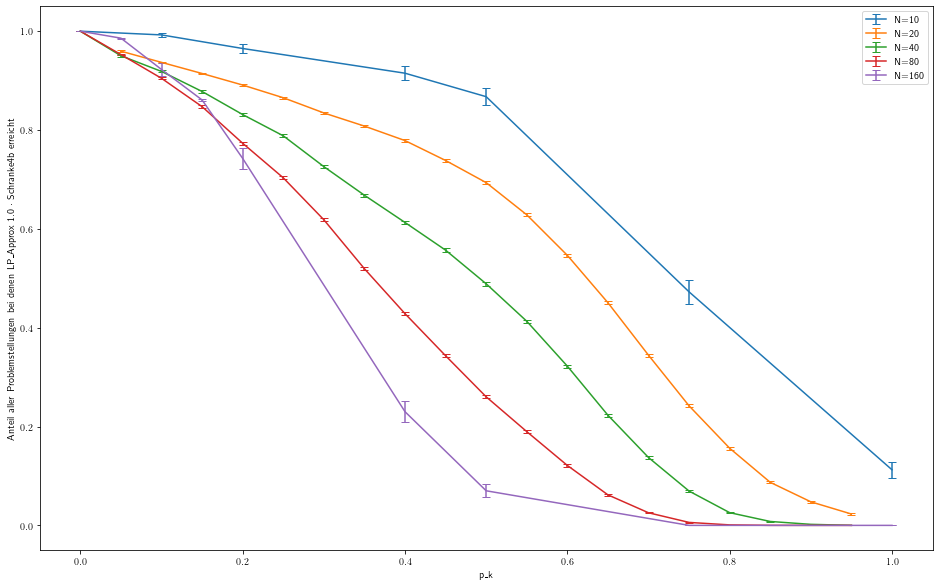

In [36]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.0
alg='LP_Approx'

pcs = auswertung_ma.prepare_alg_vs_schranke_data(data2, data2_vor, alg, alpha)

for n in sorted(pcs.keys()):
    
    ax.errorbar(pcs[n].ids, pcs[n].props, yerr=pcs[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('p_k')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen LP_Approx {alpha} $\cdot$ Schranke4b erreicht')


# ax.set_xlim([0.615,.65])
# ax.set_ylim([0.86, 0.91])

# ax.set_xlim([0.55,.7])
# ax.set_ylim([0.85, 0.95])

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen Greedy 1.2 $\\cdot$ Schranke4b erreicht')

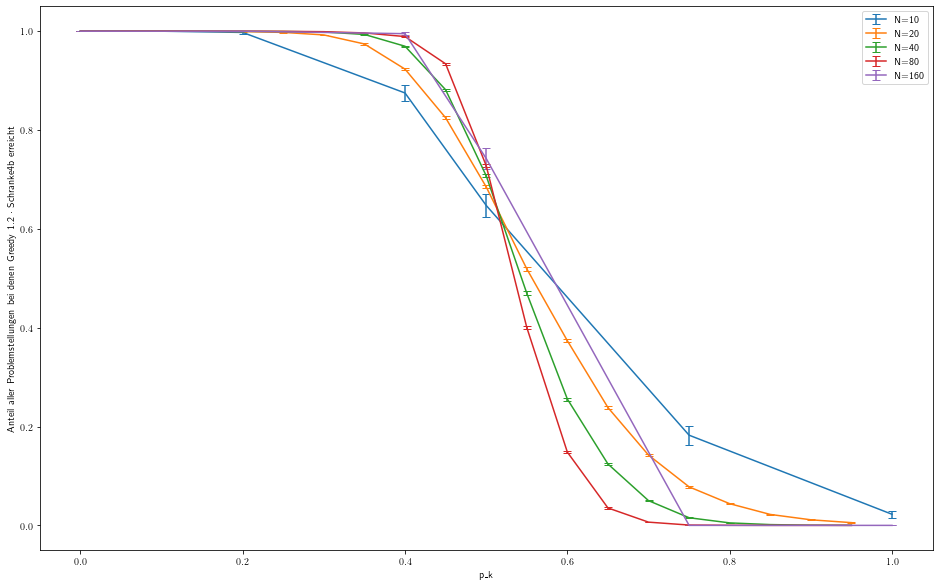

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs = auswertung_ma.prepare_alg_vs_schranke_data(data2, data2_vor, alg, alpha)

for n in sorted(pcs.keys()):
    
    ax.errorbar(pcs[n].ids, pcs[n].props, yerr=pcs[n].std_dev, capsize=4, label=f'N={n}')

ax.legend()

ax.set_xlabel('p_k')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen Greedy {alpha} $\cdot$ Schranke4b erreicht')

# ax.set_xlim([0.49,.81])
# ax.set_ylim([0.8, 1.02])
# plt.savefig('pk_uebergang_lp.png')

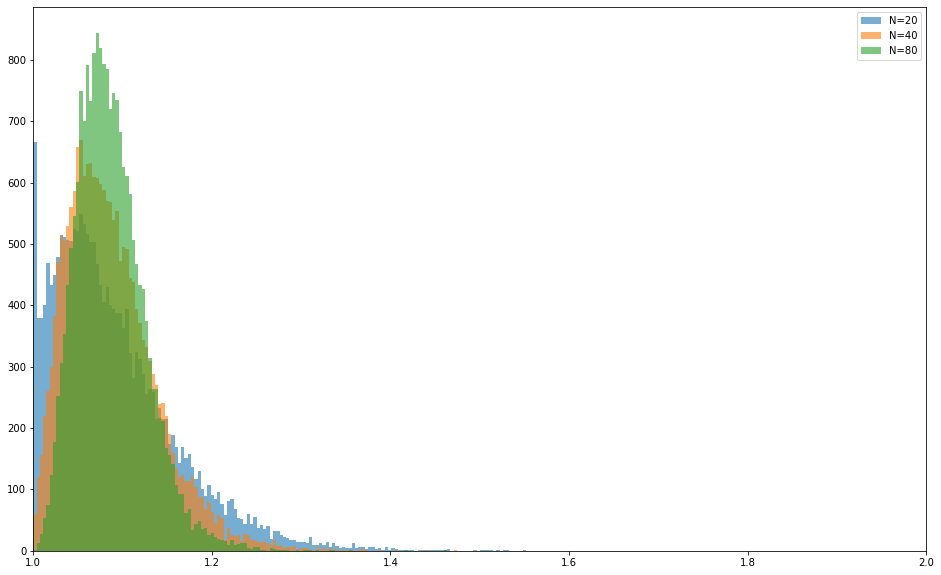

In [15]:
ns = [20,40,80]
l = [data2_vor[n] for n in ns]

# for r in l:
#     print(r.id_values)

auswertung_ma.plot_hist_alg_vs_schranke(l, ns, 'Greedy', 0.4, xlim_max=2)

Text(0.5, 0, 'p_k')

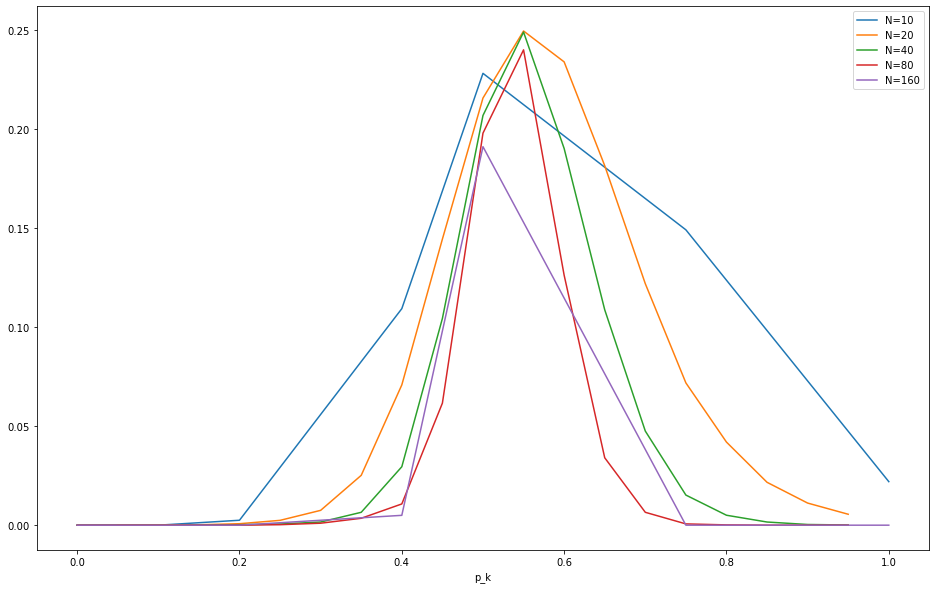

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data2, data2_vor, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.plot(pcs1[n].ids, pcs1[n].var, label=f'N={n}')
#     ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('p_k')
# ax.set_ylabel(f'Anteil aller Problemstellungen bei denen Greedy {alpha} $\cdot$ Schranke4b erreicht')

# 5 scenarios

In [300]:
# lese vorausgewertete Daten ein
pv5 = r'D:\Uni\Masterarbeit\Daten\KFC2\5_scenarios\Vorauswertung'

data_vor5, dic_lp5 = auswertung_ma.read_vorauswertung(pv5, id='p', id_stelle=-2, read_lp=True)

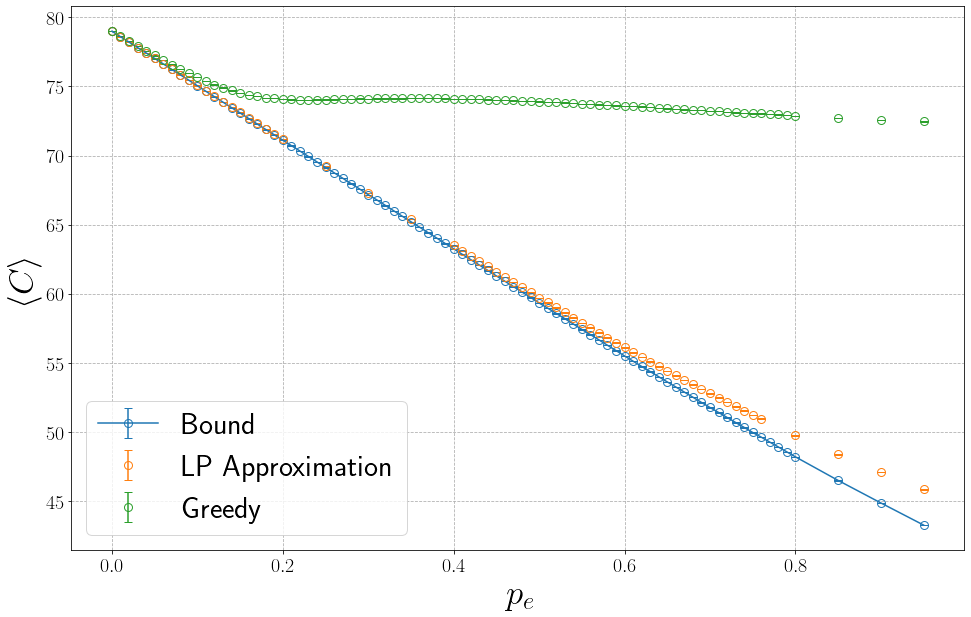

In [315]:
# reine Ergebnisse

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

n=80

algs = {'Schranke4b': r'Bound', 'LP_Approx': 'LP Approximation', 'Greedy': 'Greedy'}

m, sme = data_vor5[n].calc_mean_alg_results()

# pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)
fmts = ['v', '^', '<']
fmts = ['o-', 'o', 'o']

for i, alg in enumerate(m.columns):
#     ax.scatter(d.index, d[alg], label=f'{algs[alg]}, N={n}')
#     ax.scatter(m.index, m[alg], label=f'{algs[alg]}')
    d = m.dropna(subset=[alg])
    smes = sme.dropna(subset=[alg])
    ax.errorbar(d.index, d[alg], yerr=smes[alg], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'{algs[alg]}')

# ax.set_xlim([1.9, 3.1])

# ax.vlines(0.6355444309347226, 0, 520, color='black')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel('$\\langle C \\rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')
plt.savefig(os.path.join(plot_output_path, 'res_80_5sce.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
160
320
640
1280


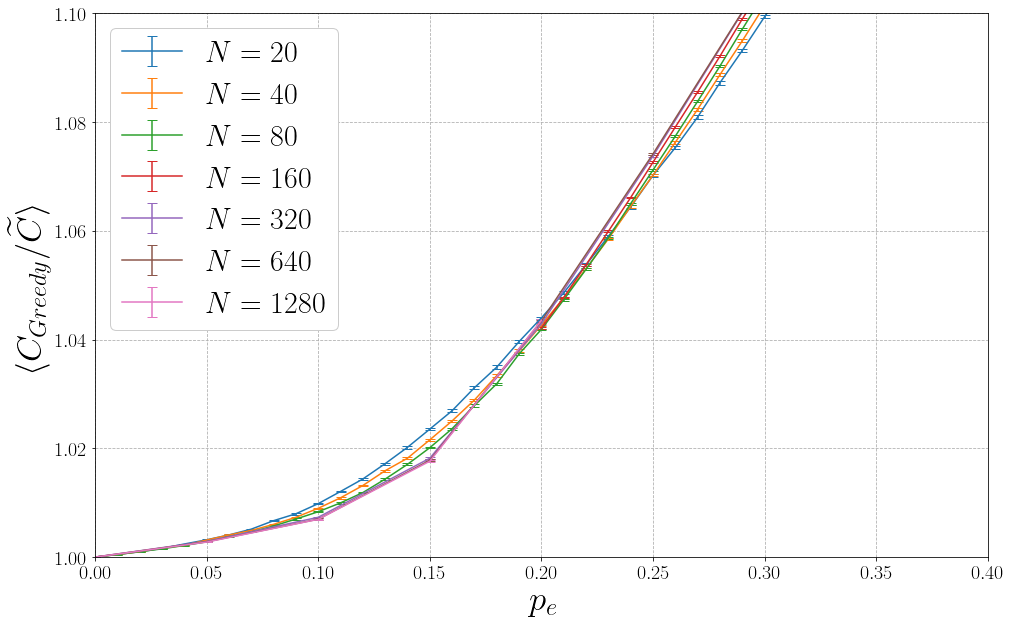

In [302]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor5.keys()):
    print(l)
    if l in [20, 40, 80, 160, 320, 640, 1280, 2560]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor5[l].id_values:

            if alg in data_vor5[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((0.,0.4))
ax.set_ylim((1.0, 1.1))
plt.savefig(os.path.join(plot_output_path, 'pe_greedy_durch_bound_5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
160
320
640
1280


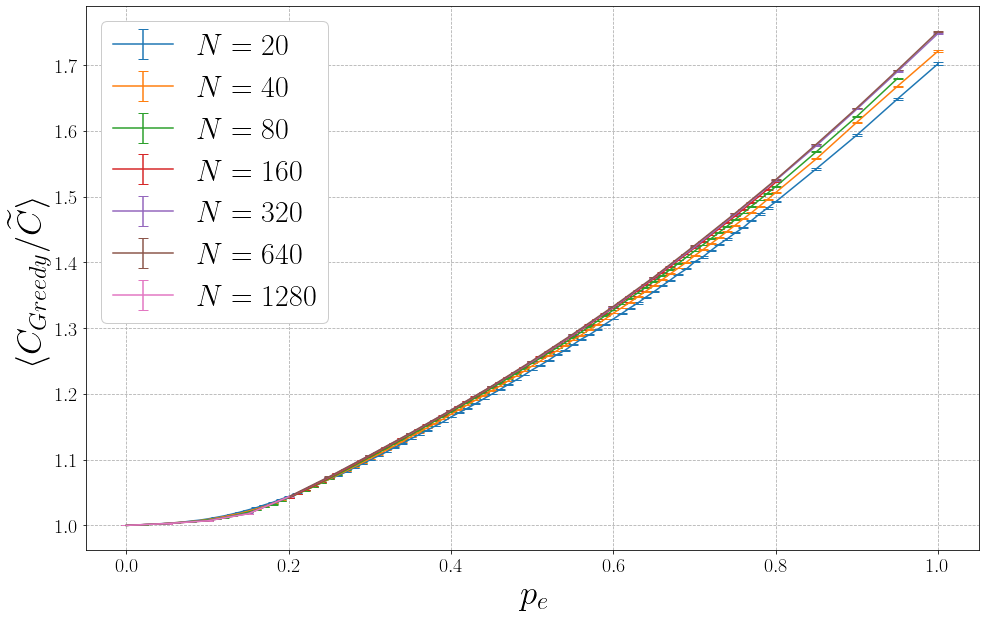

In [303]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor5.keys()):
    print(l)
    if l in [20, 40, 80, 160, 320, 640, 1280, 2560]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor5[l].id_values:

            if alg in data_vor5[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((0.5,0.7))
# ax.set_ylim((1.05, 1.25))
plt.savefig(os.path.join(plot_output_path, 'pe_greedy_durch_bound_5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
160
320
640
1280


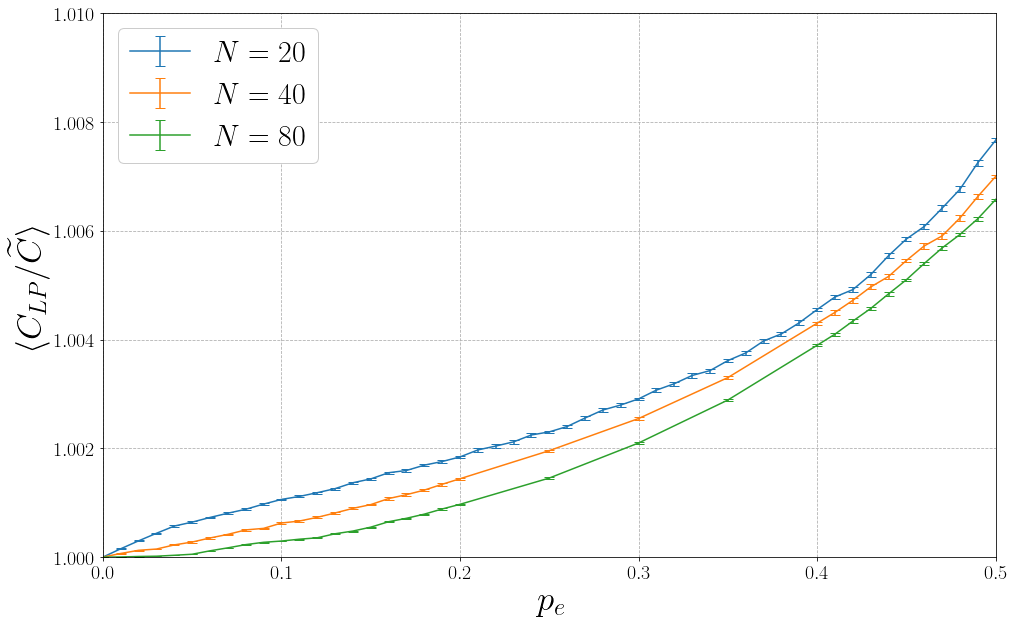

In [304]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor5.keys()):
    print(l)
    if l in [20, 40, 80]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor5[l].id_values:

            if alg in data_vor5[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((0.,0.5))
ax.set_ylim((1.0, 1.01))
plt.savefig(os.path.join(plot_output_path, 'pe_lp_durch_bound_5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
160
320
640
1280


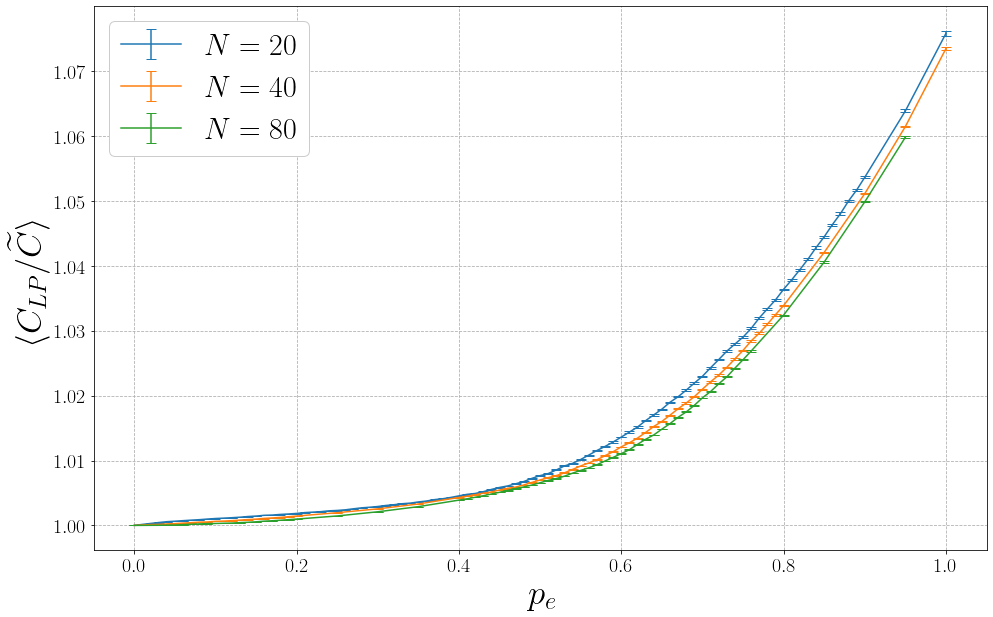

In [305]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor5.keys()):
    print(l)
    if l in [20, 40, 80]:
    
        ii = []
        mean_vhs = []
        delta_vhs = []

        for i in data_vor5[l].id_values:

            if alg in data_vor5[l].raw_results[i].columns:

                ii.append(i)

                subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

                vh = subset[alg] / subset['Schranke4b']

                mean_vhs.append(vh.mean())
                delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

        ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((0.5,0.7))
# ax.set_ylim((1.05, 1.25))
plt.savefig(os.path.join(plot_output_path, 'pe_lp_durch_bound_5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80


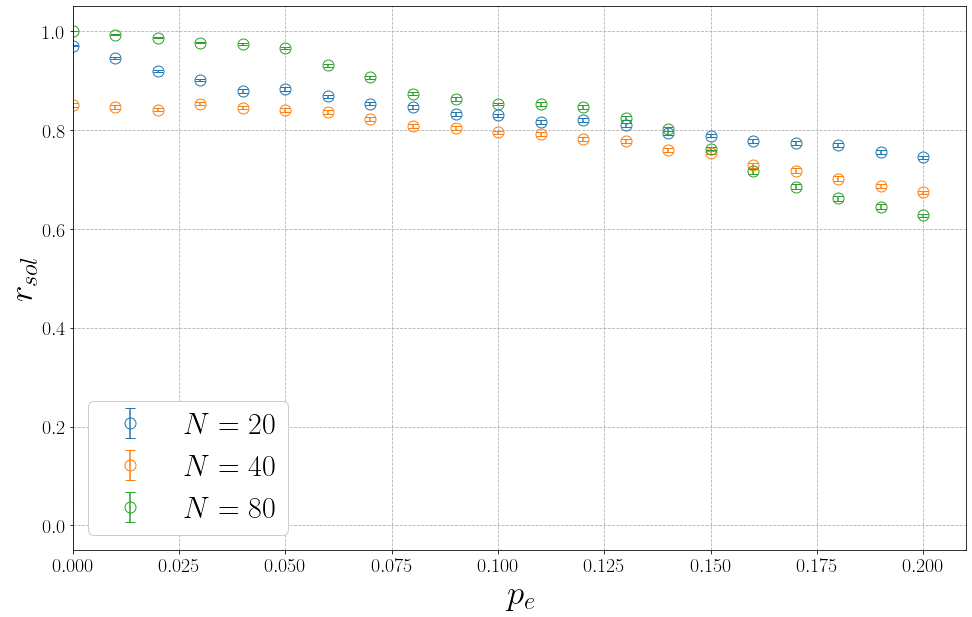

In [306]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in sorted(dic_lp5.keys()):
    print(n)
    
    ax.errorbar(dic_lp5[n].index, dic_lp5[n]['Anteil_GGL'], yerr=dic_lp5[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$r_{sol}$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim([0, 0.21])
# ax.set_ylim([0.95, 1.01])

plt.savefig(os.path.join(plot_output_path, 'pe_rsol5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80


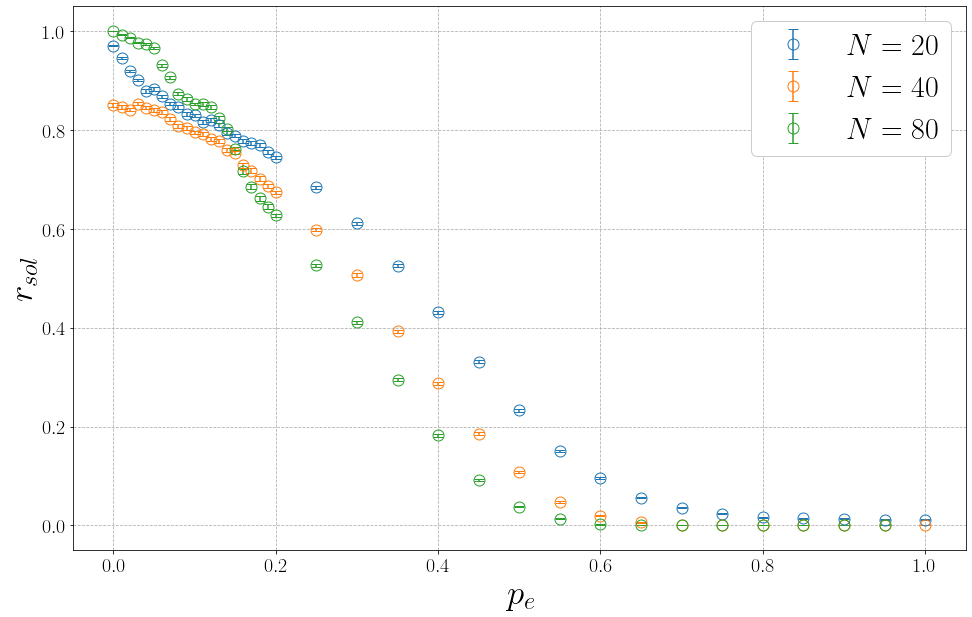

In [307]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in sorted(dic_lp5.keys()):
    print(n)
    
    ax.errorbar(dic_lp5[n].index, dic_lp5[n]['Anteil_GGL'], yerr=dic_lp5[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$r_{sol}$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0, 1])
# ax.set_ylim([0.95, 1.01])

plt.savefig(os.path.join(plot_output_path, 'pe_rsol5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

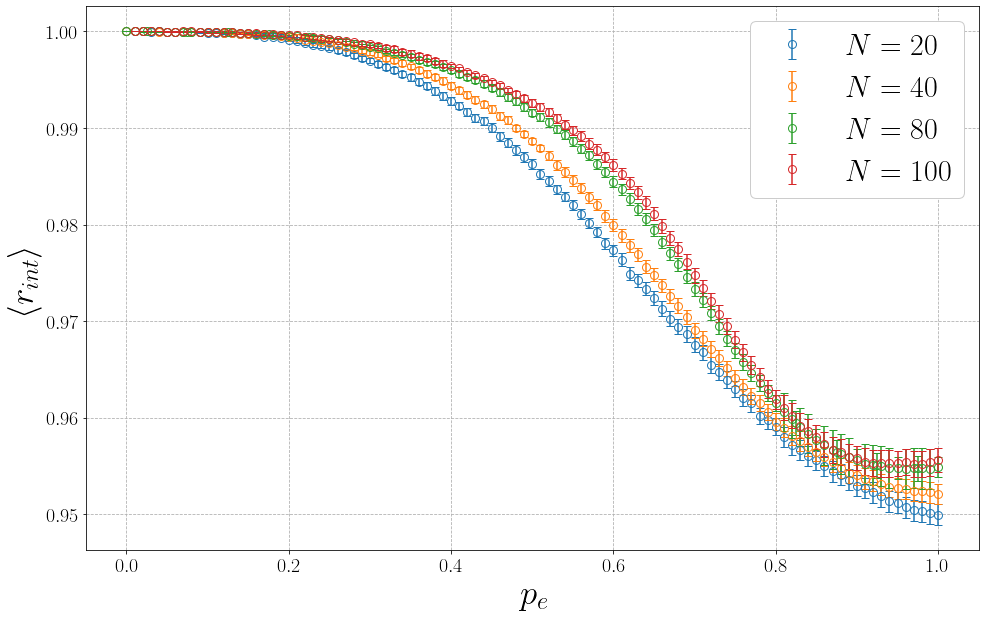

In [309]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']


for n in sorted(dic_lp1.keys()):

    if n != 120:
#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
        ax.errorbar(dic_lp1[n].index, dic_lp1[n]['Anteil_GLPV'], yerr=dic_lp1[n]['Delta_Anteil_GLPV'], fmt=fmts[0], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')


plt.savefig(os.path.join(plot_output_path, 'pe_rint1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

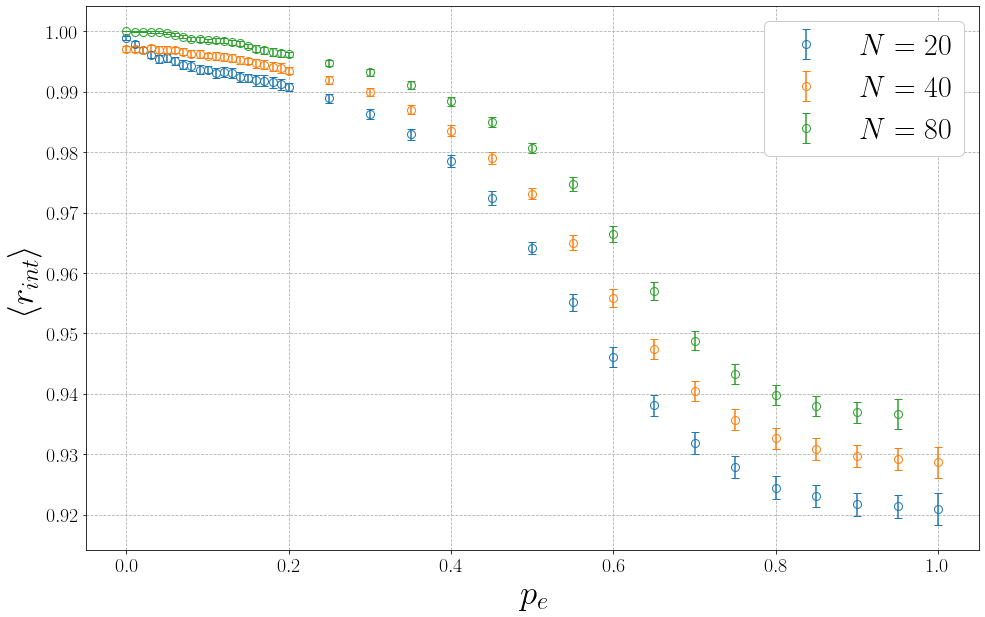

In [310]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']


for n in sorted(dic_lp5.keys()):

#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
    ax.errorbar(dic_lp5[n].index, dic_lp5[n]['Anteil_GLPV'], yerr=dic_lp5[n]['Delta_Anteil_GLPV'], fmt=fmts[0], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')


plt.savefig(os.path.join(plot_output_path, 'pe_rint5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

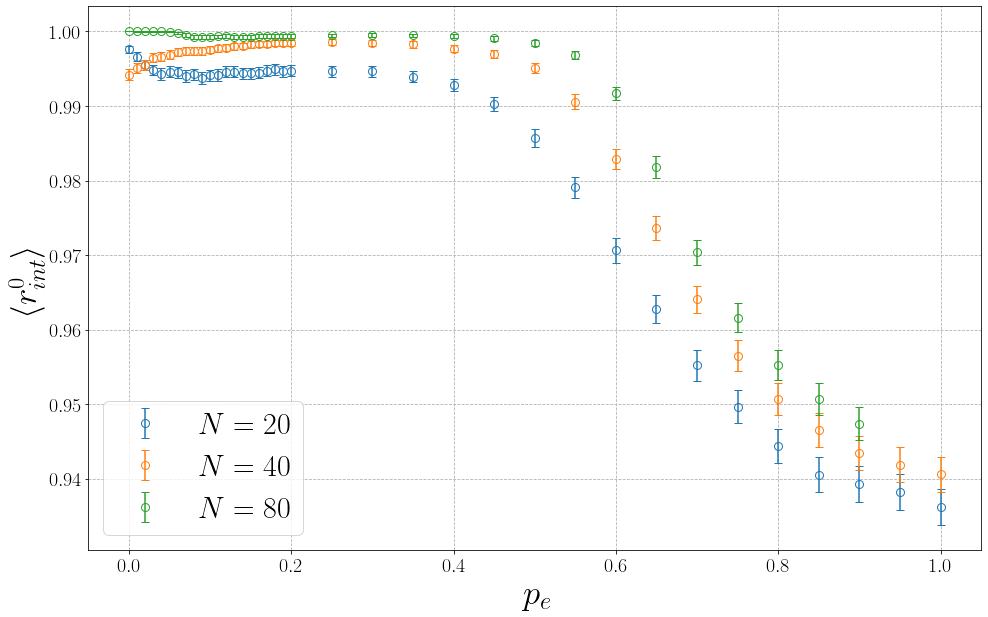

In [311]:
# Anteil ganzzahliger LP Variablen aus der ersten Stage

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o', 'o']

ns = sorted(dic_lp5.keys())

for i, n in enumerate(ns):
    
    if 'Delta_Anteil_GLPV0' in dic_lp5[n].columns:
    
        # subset, wo 'Anteil_GLPV0' auch vorhanden ist
        df_subset = dic_lp5[n].dropna(subset='Anteil_GLPV0')
    
        ax.errorbar(df_subset.index, df_subset['Anteil_GLPV0'], yerr=df_subset['Delta_Anteil_GLPV0'], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')
#         ax.errorbar(dic_lp[n].index, dic_lp[n]['Anteil_GLPV0'], yerr=dic_lp[n]['Delta_Anteil_GLPV0'], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'$N={n}$')
#         ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV0'], label=f'N={n}')
        
# ax.set_xlim([0.4, 0.6])
# ax.set_ylim([50, 60])


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int}^0 \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')
              
              
plt.savefig(os.path.join(plot_output_path, 'pe_rint0_5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

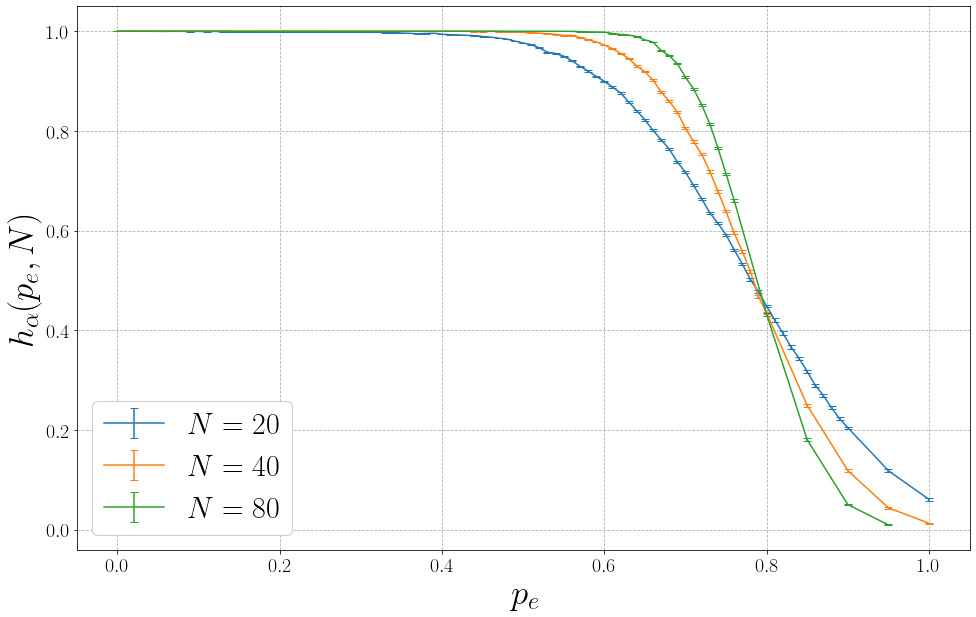

In [312]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.03
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor5, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'$N={n}$')

ax.legend(fontsize=30, framealpha=1, loc='lower left')

# ax.set_xlabel('$p_k$', fontsize=axislabelsize)
# ax.set_ylabel(f'$p_\\alpha$ with $\\alpha ={alpha}$', fontsize=axislabelsize)

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(f'$h_\\alpha(p_e, N)$', fontsize=axislabelsize)

# ax.set_xlim([0.19,.94])
# ax.set_ylim([0.6, 1.02])

# ax.set_xlim([0.55,.81])
# ax.set_ylim([0.64, 0.99])
# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
# ax.text(0.39, 0.02, f"LP, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)


plt.savefig(os.path.join(plot_output_path, f'pe_lp_h_{alpha}_5.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

(-8.1, 4.1)

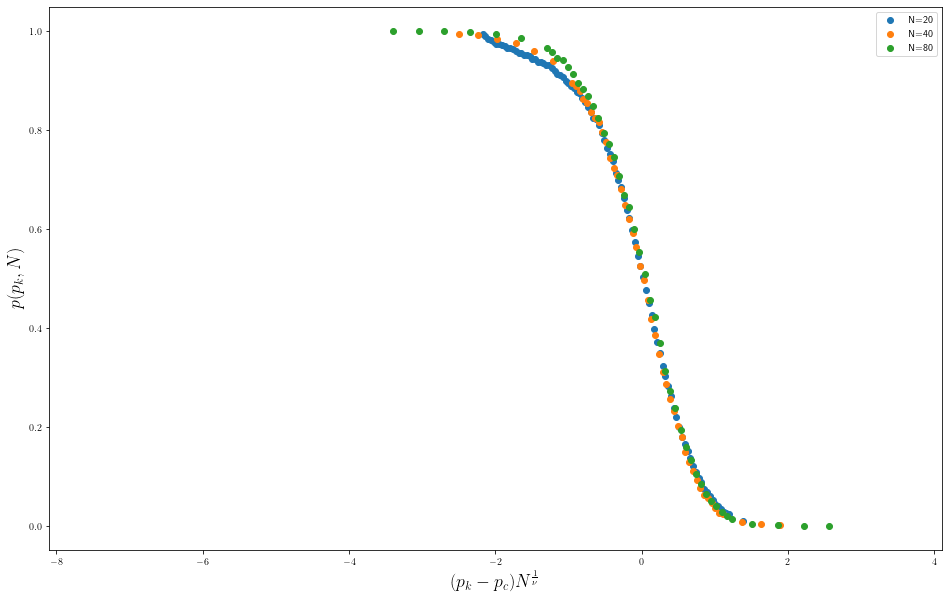

In [43]:
fig, ax = plt.subplots(figsize=(16,10))
# 1.01, 20, 40, 80
nu = 2.2498789090357034
zeta = 0.041057593300929326
krit = 0.5840802374373868


# pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)

for n in sorted(pcs1.keys()):
#     if n >= 320:
#     ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) * n ** (-1 * zeta/nu) , label=f'N={n}')
        ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) , label=f'N={n}')
    
ax.legend()
ax.set_xlabel(r"$(p_k - p_c) N^{\frac{1}{\nu}}$", fontsize=18)
# ax.set_ylabel(r"$p(p_k,N) N^{\frac{-\zeta}{\nu}}$", fontsize=18)
ax.set_ylabel(r"$p(p_k,N)$", fontsize=18)
ax.set_xlim((-8.1, 4.1))

# plt.savefig('kollaps_greedy_1sc.png', dpi=300, facecolor=[1,1,1,1])

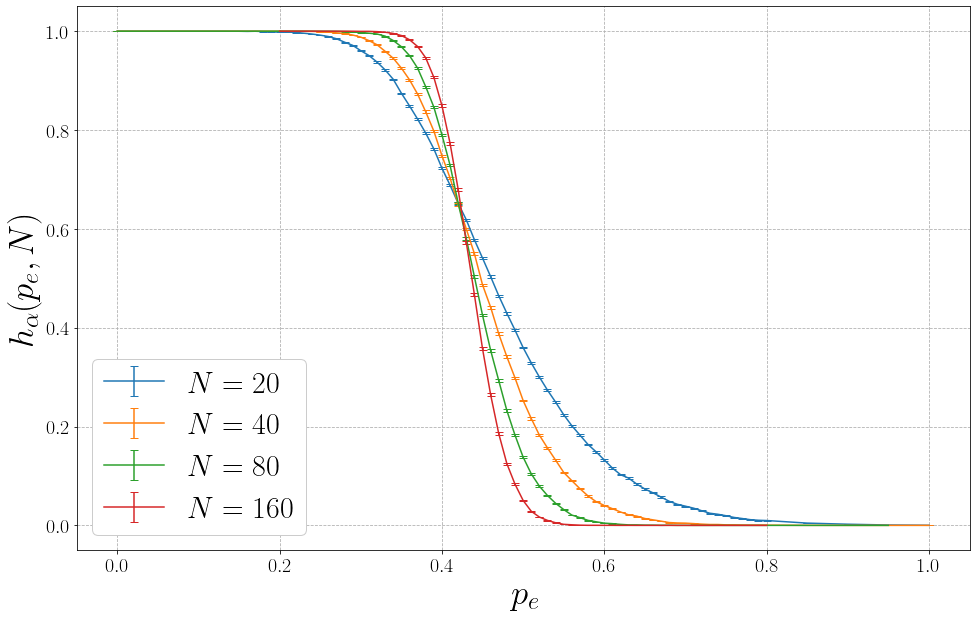

In [314]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor5, alg, alpha)

for n in sorted(pcs.keys())[:-3]:
    
    ax.errorbar(pcs[n].ids, pcs[n].props, yerr=pcs[n].std_dev, capsize=4, label=f'$N={n}$')


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(f'$h_\\alpha(p_e, N)$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1, loc='lower left')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0.295, 0.805])

# alpha = 1.2
# ax.set_xlim([0.6,.66])
# ax.set_ylim([0.8, 1.02])

# alpha = 1.1
# ax.set_xlim([0.53, 0.58])
# ax.set_ylim([0.4, 0.8])
# ax.text(0.315, 0.02, f"Greedy, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)

plt.savefig(os.path.join(plot_output_path, f'pe_greedy_h_{alpha}_5.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')
# ax.set_xlim([0.49,.81])
# ax.set_ylim([0.8, 1.02])
# plt.savefig('pk_uebergang_lp.png')

In [220]:
alpha=1.03
alg='LP_Approx'

pcs5 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor5, alg, alpha)

# l = [160, 320, 640, 1280, 2560]
l = [20, 40, 80]

print(prepare_fssa(l, pcs5, f'lp_5_alpha_{alpha}_20-80'))

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.8, 0.85, 0.9, 0.95]
None


(-8.1, 4.1)

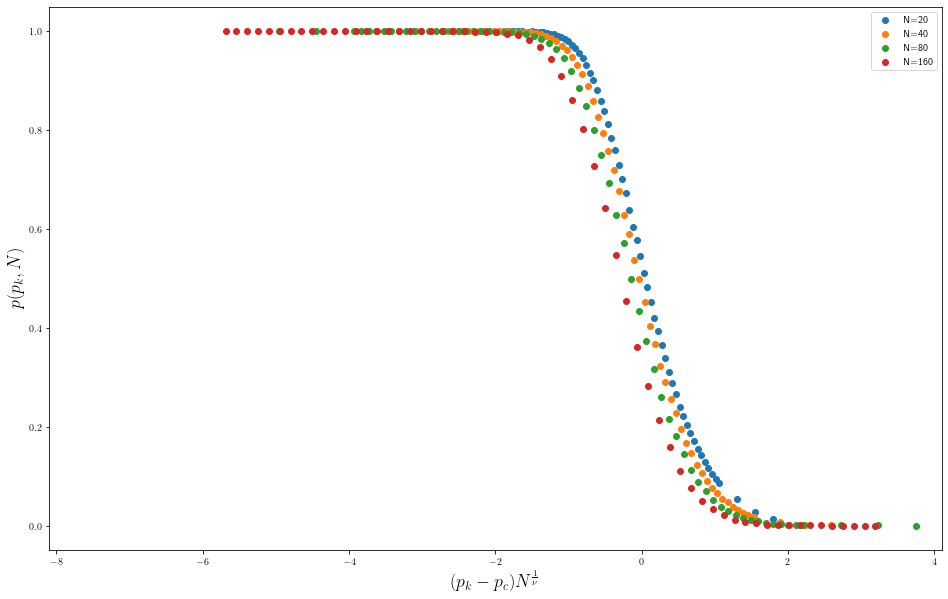

In [46]:
fig, ax = plt.subplots(figsize=(16,10))
# 1.3, 20, 40, 80
nu = 1.8834708854731304
zeta = -0.005752769694261696
krit = 0.5840802374373868

# pcs1 = auswertung_ma.prepare_alg_vs_schranke_data(data1, data1_vor, alg, alpha)

for n in sorted(pcs.keys()):
#     if n >= 320:
#     ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) * n ** (-1 * zeta/nu) , label=f'N={n}')
        ax.scatter((np.array(pcs[n].ids) - krit) * n ** (1 / nu), np.array(pcs[n].props) , label=f'N={n}')
    
ax.legend()
ax.set_xlabel(r"$(p_k - p_c) N^{\frac{1}{\nu}}$", fontsize=18)
# ax.set_ylabel(r"$p(p_k,N) N^{\frac{-\zeta}{\nu}}$", fontsize=18)
ax.set_ylabel(r"$p(p_k,N)$", fontsize=18)
ax.set_xlim((-8.1, 4.1))

# plt.savefig('kollaps_greedy_1sc.png', dpi=300, facecolor=[1,1,1,1])

 N = 20; Max: 0.5997694089461006
 N = 40; Max: 0.5846513787710941
 N = 80; Max: 0.5739860886968774
 N = 160; Max: 0.5669576188797217
 N = 320; Max: 0.5645490918284759
 N = 640; Max: 0.5621814092806753
[ 20  40  80 160 320 640]
[0.55933052 0.42005429 1.29416807]
[0.00054479 0.08300283 0.09922169]


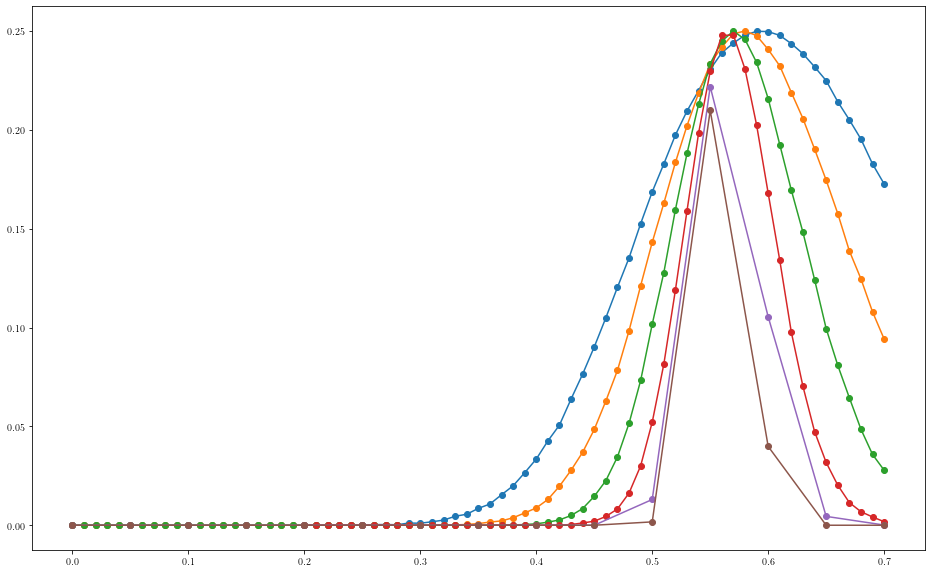

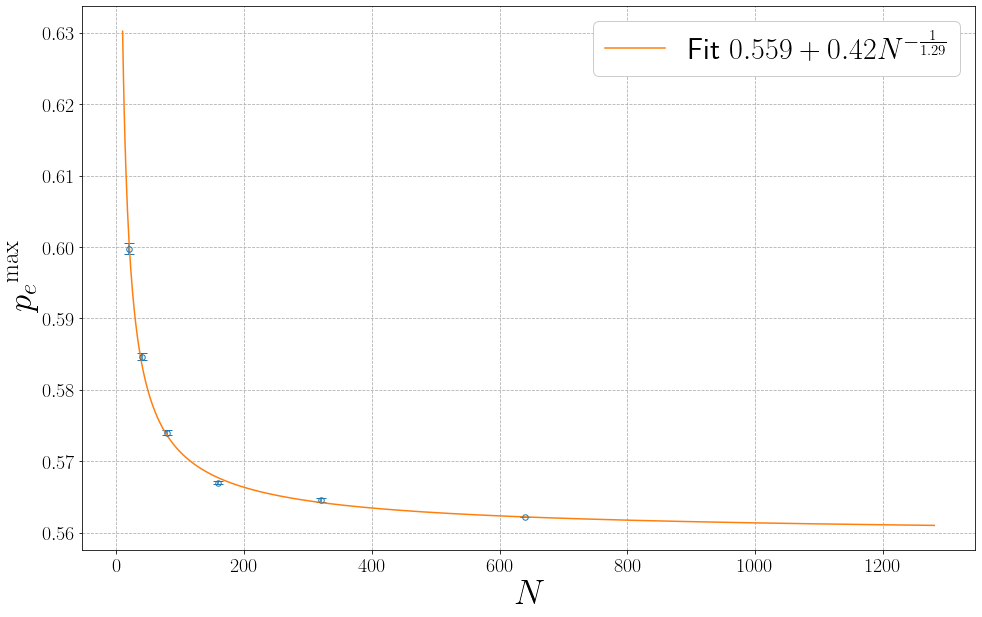

In [327]:
alpha=1.3
alg='Greedy'

u, o = 0., .7
# lege Intervalle fest innerhalb welcher ich den gauss fit machen will
# ints = {10: [0.5, 0.8], 20: [0.5,0.8], 40: [0.51, 0.8], 80: [0.5, 0.8], 160: [0.3, 0.8], 320: [0.3, 0.8], 640: [0.3, 0.75], 1280: [0.3, 0.8]}
ints = {10: [u, o], 20: [u,o], 40: [u, o], 80: [u, o], 100: [u, o], 120: [u, o], 160: [u, o], 320: [u, o], 640: [u, o], 1280: [u, o]}


def var_fit(N, xkrit, b, nu):
    return xkrit + b * N ** (-1/nu)

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor5, alg, alpha)

popts = []
delta_popts = []

fig, ax = plt.subplots(figsize=(16,10))
for n in [20, 40, 80, 160, 320, 640]:
    
    
    indices = (ints[n][0] <= np.array(pcs1[n].ids)) & (np.array(pcs1[n].ids) <= ints[n][1])
    ii, vv = np.array(pcs1[n].ids)[indices], np.array(pcs1[n].var)[indices]
    
    dd = np.array(pcs1[n].delta_var)[indices]
    
    ax.plot(ii, vv, 'o-', label=f"$N={n}$")
    
    popt, pcov = curve_fit(gauss, ii, vv, p0=(0, 0,2), maxfev=100000)
    
    popts.append(popt[0])
    delta_popts.append(np.sqrt(np.diag(pcov))[0])
    
    print(f" N = {n}; Max: {popt[0]}")
    
    
nnnsss = np.array([20, 40, 80, 160, 320, 640])


#### ANGEBEN, WELCHE WERTE ICH BENUTZEN WILL
J = 0
print(nnnsss[J:])

popt, pcov = curve_fit(var_fit, nnnsss[J:], np.array(popts)[J:], sigma=np.array(delta_popts)[J:], p0=(0.5, 0, 1), bounds=([0,0,0], [10,10,10]), maxfev=100000)
print(popt)
print(np.sqrt(np.diag(pcov)))

fig, ax = plt.subplots(figsize=(16,10))

ns = [20, 40, 80, 160, 320, 640]

fmts = ['.', '.', '.', '.']

# for i, n in enumerate(ns):
    
ax.errorbar(ns, popts, yerr=delta_popts, fmt='.', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor)

ns2 = np.linspace(10, 1280, 1000)

ax.plot(ns2, var_fit(ns2, *popt), label=f'Fit ${popt[0]:.3} + {popt[1]:.3} N^{{-\\frac{1}{{{popt[2]:.3}}}}}$')

ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(f'${{p_e}}^{{\\max}}$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0.295, 0.805])
# ax.text(0.45, 0.02, f"Greedy, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)
# alpha = 1.2
# ax.set_xlim([0.6,.66])
# ax.set_ylim([0.8, 1.02])

# alpha = 1.1
# ax.set_xlim([0.53, 0.58])
# ax.set_ylim([0.4, 0.8])

# plt.savefig(os.path.join(plot_output_path, f'pemax_greedy_1_{alpha}.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

NameError: name 'data5_vor' is not defined

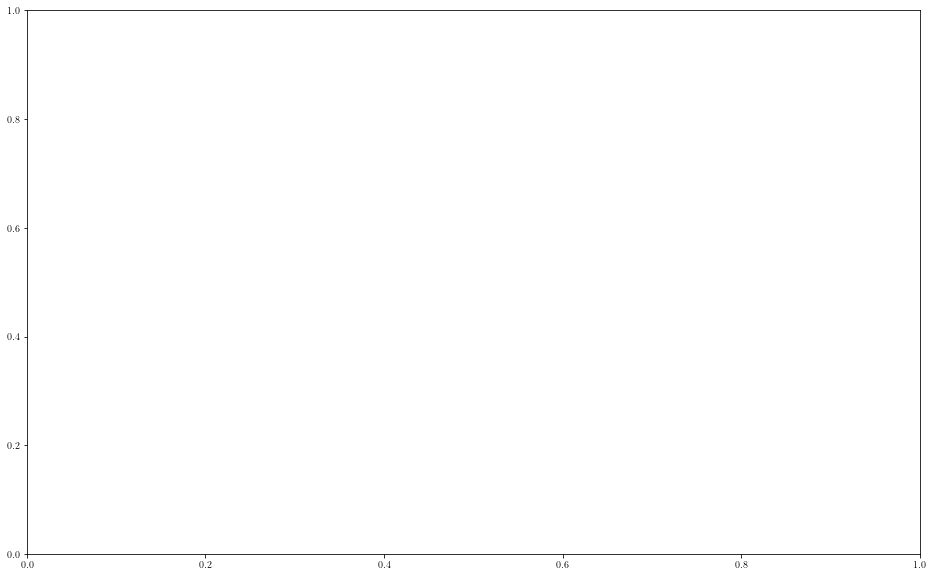

In [298]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.3
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data5_vor, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.plot(pcs1[n].ids, pcs1[n].var, 'o-', label=f'N={n}')
#     ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('p_k')
# ax.set_ylabel(f'Anteil aller Problemstellungen bei denen Greedy {alpha} $\cdot$ Schranke4b erreicht')